<a href="https://colab.research.google.com/github/Lordrizal/portofolio/blob/dev/M5_ml_cancer.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Nama: Ahmad Rizal Bayhaqi
NRP: 2043201047
Kelas: C

# ML Cancer Classification

## Library

In [126]:
# libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
%matplotlib inline
import seaborn as sns
from sklearn.preprocessing import LabelEncoder

from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import RobustScaler, MinMaxScaler, StandardScaler

from sklearn import svm
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier

from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from sklearn.metrics import accuracy_score, confusion_matrix

## Preprocessing

### Load Data

In [70]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [71]:
# Load dataset
dir = "/content/drive/MyDrive/Colab Notebooks/ml_storage/Sem7_ML/cancer.csv"
df = pd.read_csv(dir, encoding='latin1')#unicode_escape
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 33 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

In [72]:
df.head(2)

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.8,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.6,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.9,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.8,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN


In [73]:
df = df.drop(['id','Unnamed: 32'],axis=1)


In [74]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
radius_mean,569.0,14.127292,3.524049,6.981000,11.700000,13.370000,15.780000,28.11000
texture_mean,569.0,19.289649,4.301036,9.710000,16.170000,18.840000,21.800000,39.28000
perimeter_mean,569.0,91.969033,24.298981,43.790000,75.170000,86.240000,104.100000,188.50000
area_mean,569.0,654.889104,351.914129,143.500000,420.300000,551.100000,782.700000,2501.00000
smoothness_mean,569.0,0.096360,0.014064,0.052630,0.086370,0.095870,0.105300,0.16340
compactness_mean,569.0,0.104341,0.052813,0.019380,0.064920,0.092630,0.130400,0.34540
concavity_mean,569.0,0.088799,0.079720,0.000000,0.029560,0.061540,0.130700,0.42680
concave points_mean,569.0,0.048919,0.038803,0.000000,0.020310,0.033500,0.074000,0.20120
symmetry_mean,569.0,0.181162,0.027414,0.106000,0.161900,0.179200,0.195700,0.30400
fractal_dimension_mean,569.0,0.062798,0.007060,0.049960,0.057700,0.061540,0.066120,0.09744


### Check Missing Value

In [75]:
round(df.isnull().sum()/df.shape[0]*100, 2)

diagnosis                  0.0
radius_mean                0.0
texture_mean               0.0
perimeter_mean             0.0
area_mean                  0.0
smoothness_mean            0.0
compactness_mean           0.0
concavity_mean             0.0
concave points_mean        0.0
symmetry_mean              0.0
fractal_dimension_mean     0.0
radius_se                  0.0
texture_se                 0.0
perimeter_se               0.0
area_se                    0.0
smoothness_se              0.0
compactness_se             0.0
concavity_se               0.0
concave points_se          0.0
symmetry_se                0.0
fractal_dimension_se       0.0
radius_worst               0.0
texture_worst              0.0
perimeter_worst            0.0
area_worst                 0.0
smoothness_worst           0.0
compactness_worst          0.0
concavity_worst            0.0
concave points_worst       0.0
symmetry_worst             0.0
fractal_dimension_worst    0.0
dtype: float64

#### Check Distribution

In [76]:
list (df.columns[1:])

['radius_mean',
 'texture_mean',
 'perimeter_mean',
 'area_mean',
 'smoothness_mean',
 'compactness_mean',
 'concavity_mean',
 'concave points_mean',
 'symmetry_mean',
 'fractal_dimension_mean',
 'radius_se',
 'texture_se',
 'perimeter_se',
 'area_se',
 'smoothness_se',
 'compactness_se',
 'concavity_se',
 'concave points_se',
 'symmetry_se',
 'fractal_dimension_se',
 'radius_worst',
 'texture_worst',
 'perimeter_worst',
 'area_worst',
 'smoothness_worst',
 'compactness_worst',
 'concavity_worst',
 'concave points_worst',
 'symmetry_worst',
 'fractal_dimension_worst']

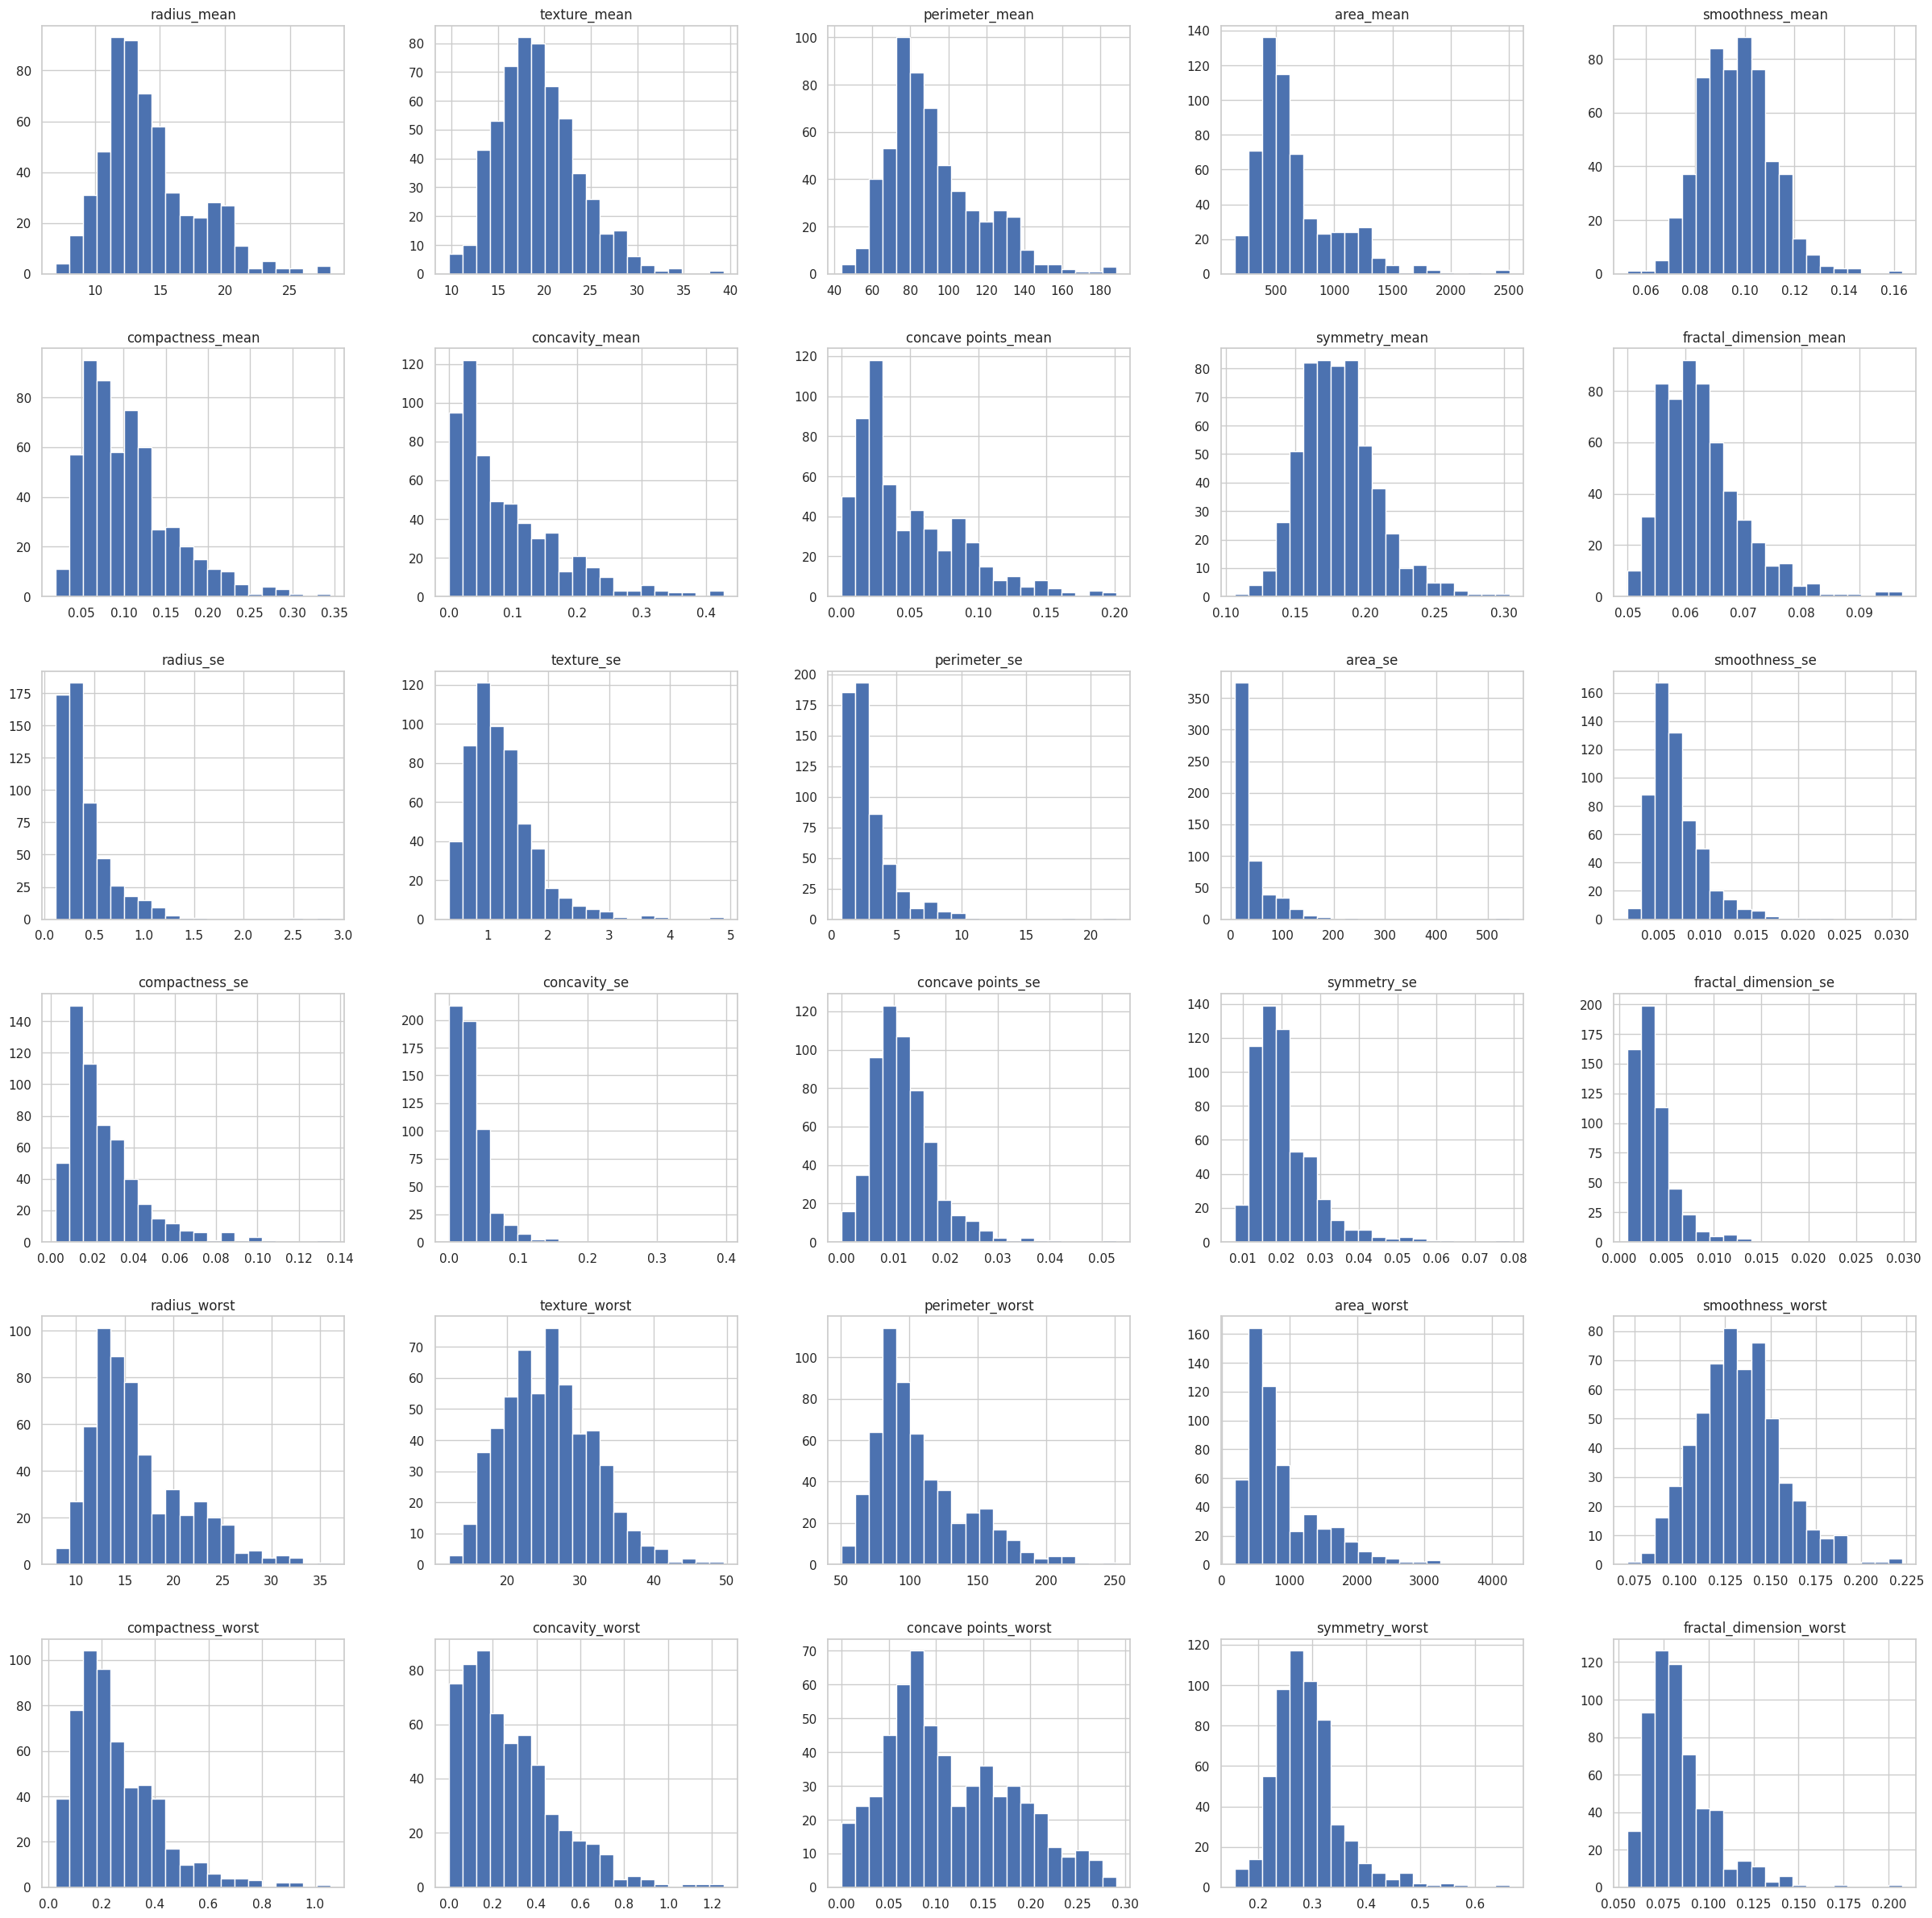

In [77]:
# Mengambil sampel beberapa kolom yang ingin dilihat distribusinya
kolom_distribusi = df[list (df.columns[1:])]
# Melihat distribusi data dengan histogram
kolom_distribusi.hist(bins=20, figsize=(30, 30))  # Anda dapat mengatur jumlah bins sesuai kebutuhan
plt.show()

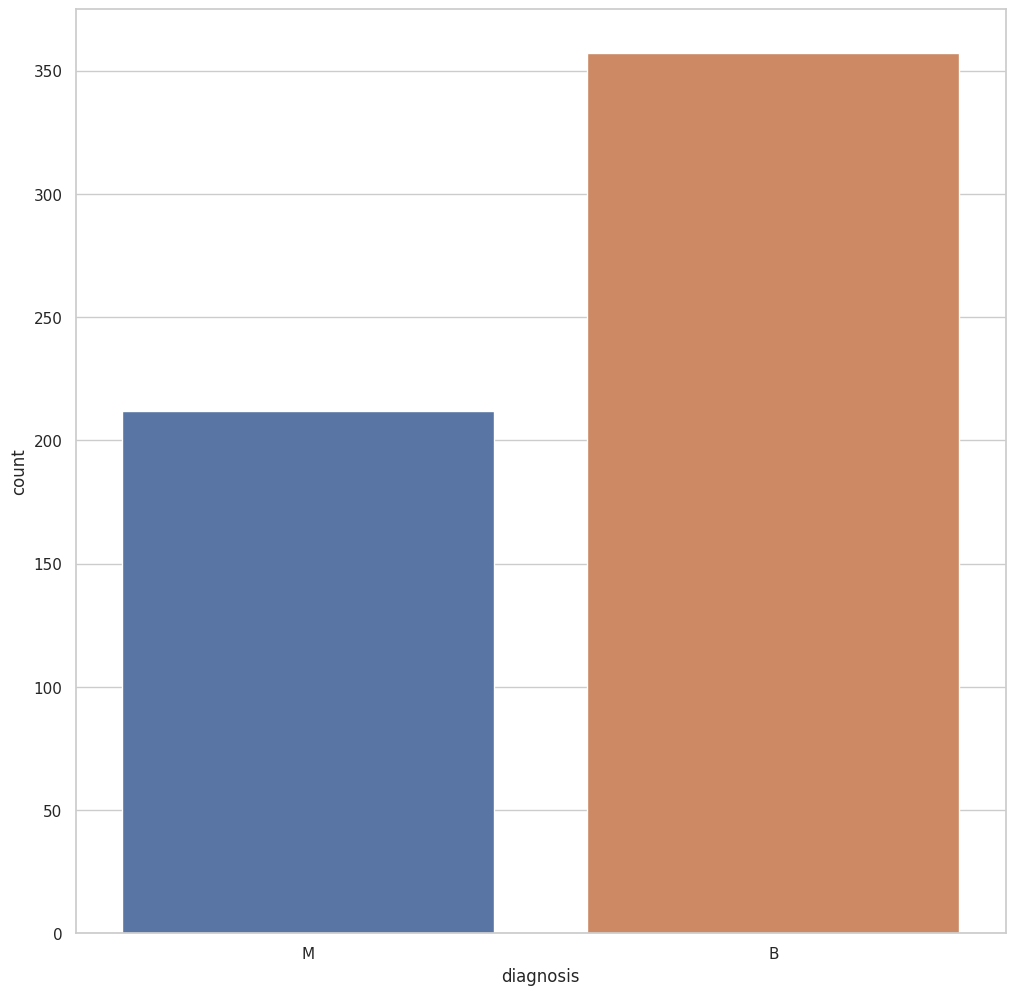

In [78]:
# Menghitung jumlah True)iment untuk tiap kategori

cm = sns.light_palette("green", as_cmap=True)
diagnosis_cat_count = df.groupby('diagnosis')['area_mean'].count().reset_index().sort_values(by = 'area_mean', ascending = False)
diagnosis_cat_count.style.background_gradient(cmap = 'Purples')

plt.figure(figsize = (12,12))
sns.countplot(x = 'diagnosis', data = df)
plt.show()

#### Check Corelation

<ipython-input-79-3fe1ec41ad18>:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = df.corr().round(2)


Text(0.5, 1.0, 'correalation Matrix untuk fitur Numerik ')

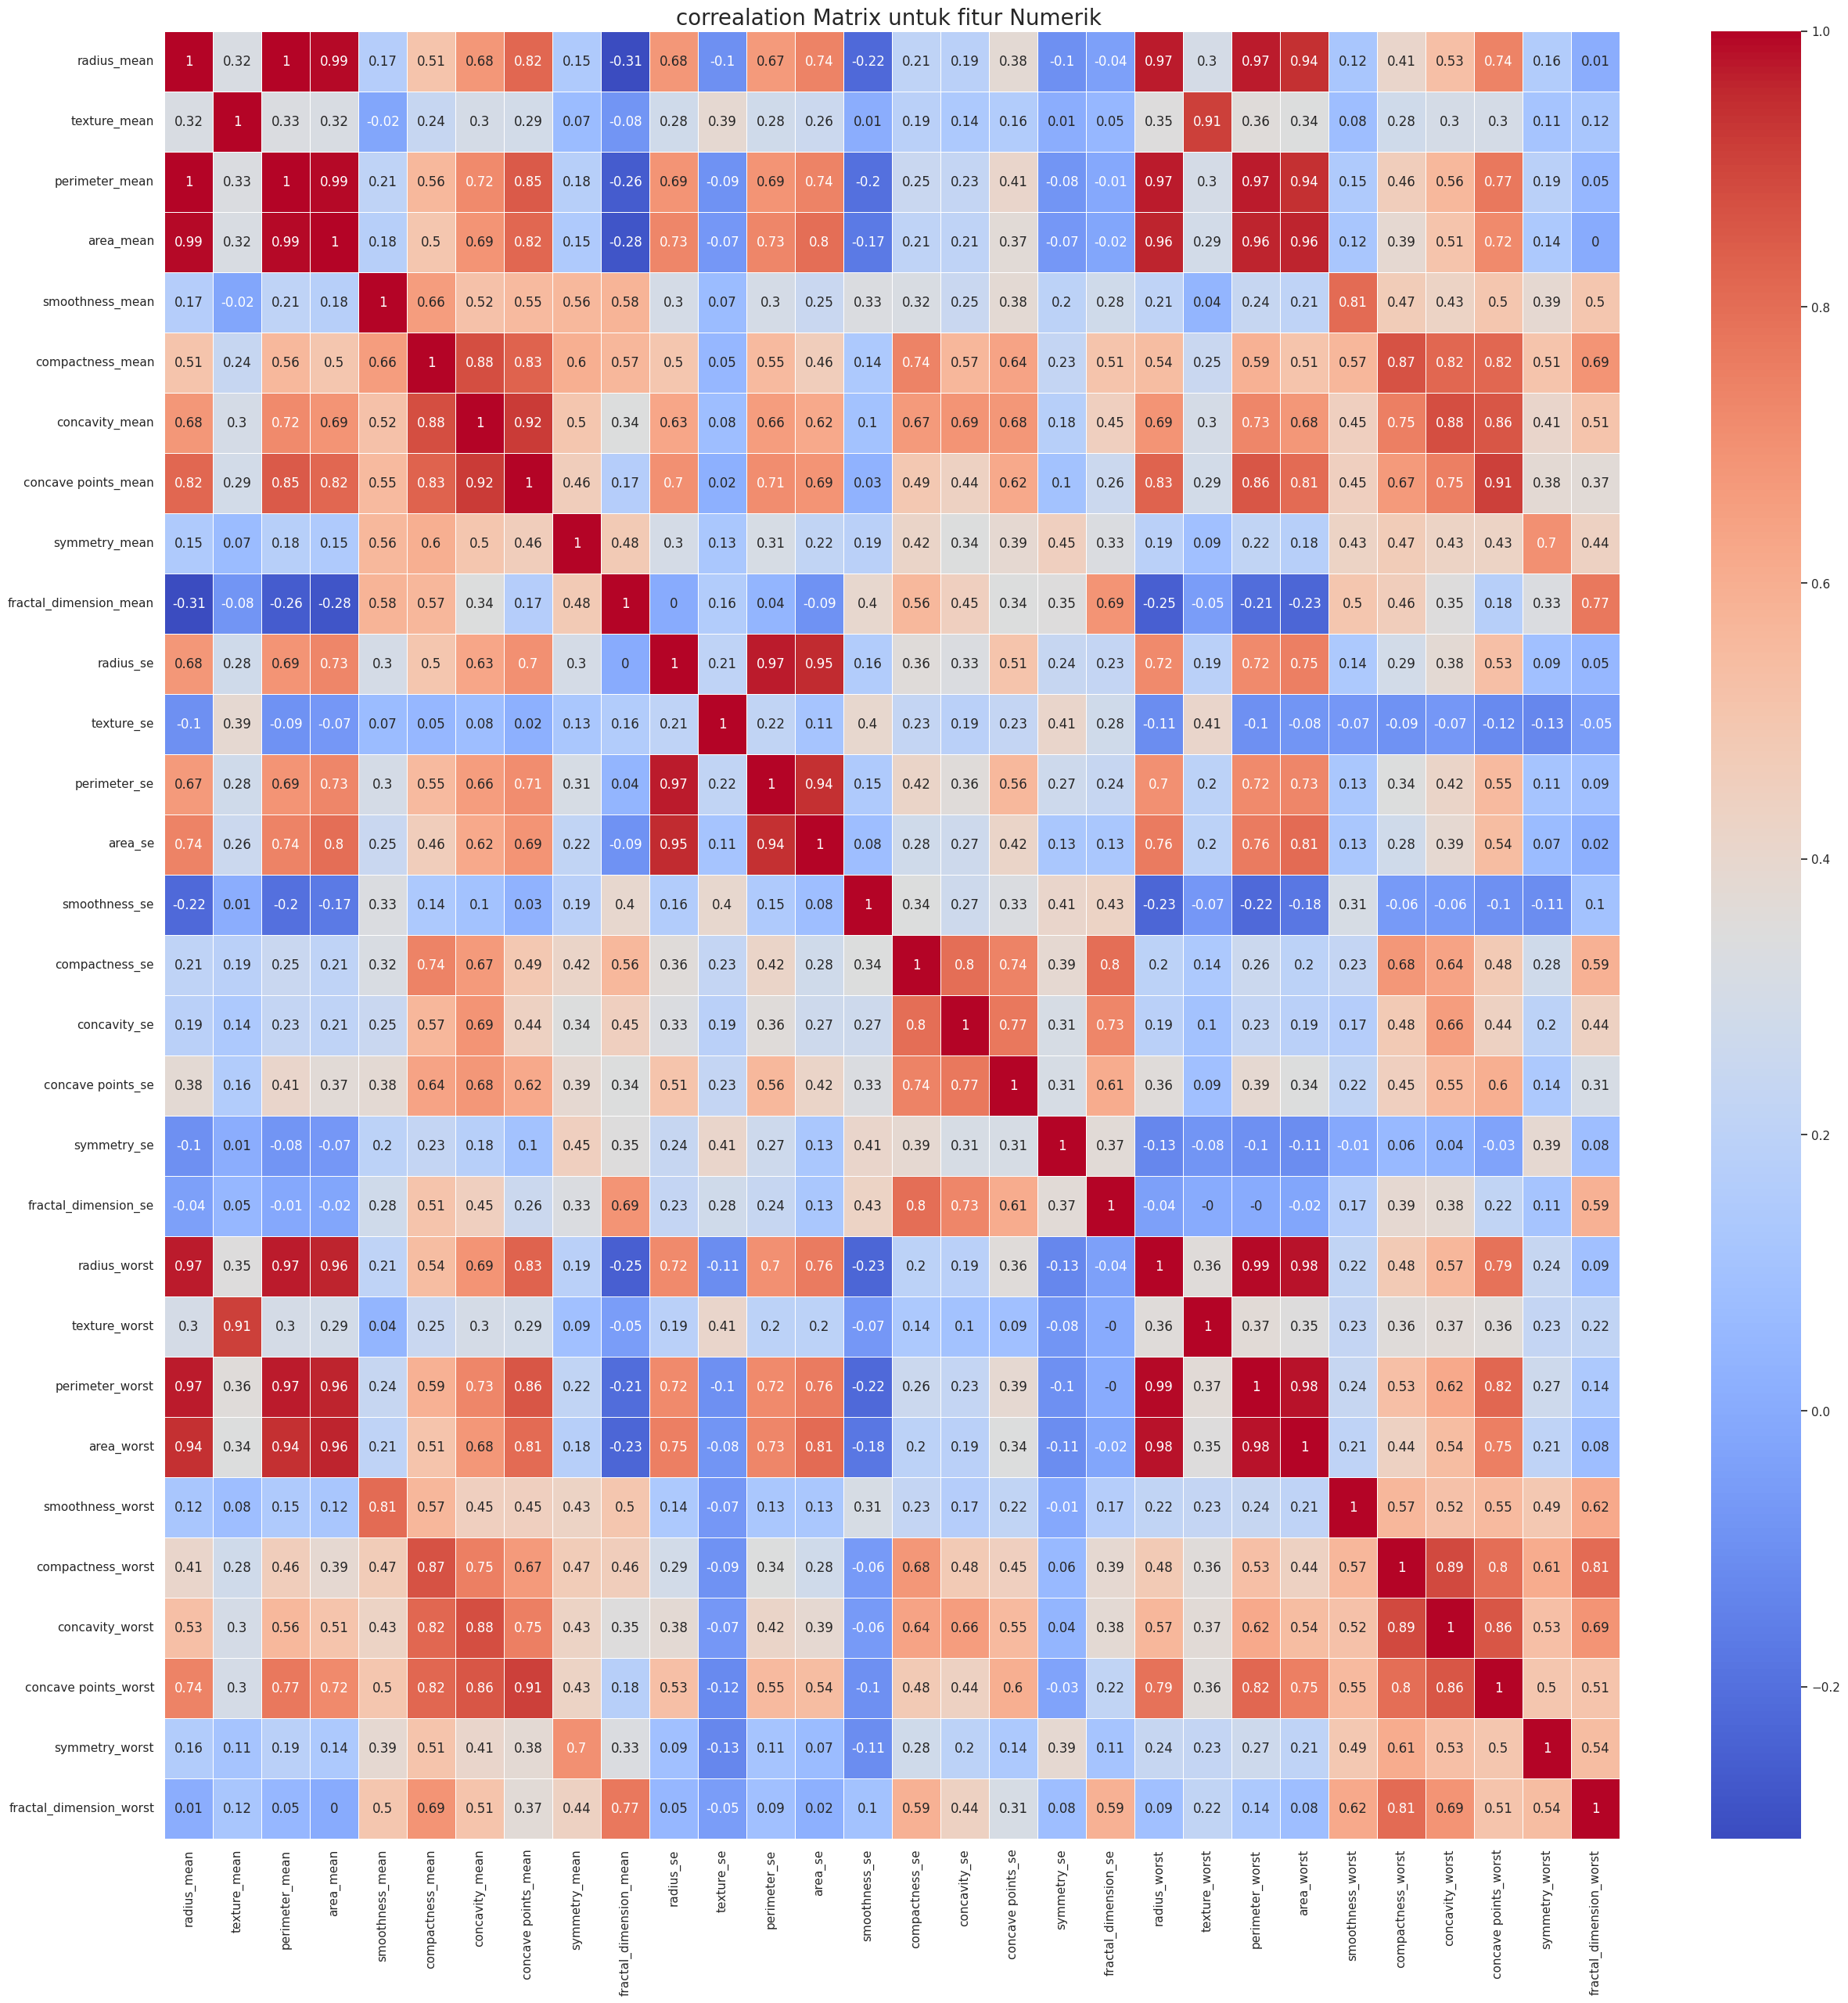

In [79]:
# Mwelihat corelasi dengan heatmap
plt.figure(figsize=(30,30))
correlation_matrix = df.corr().round(2)

# Untuk mengeprint nilai dalam kotak menggunakan parameter anot=True
sns.heatmap(data=correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5,)
plt.title("correalation Matrix untuk fitur Numerik ", size=20)

##### handling multicoliniearitas

In [80]:
df = df.drop(['radius_mean','texture_mean','perimeter_mean','area_mean',
              'radius_se','texture_se', 'perimeter_se', 'area_se' ,
              'radius_worst','texture_worst', 'perimeter_worst', 'area_worst'],axis=1)




### Check Outlier

In [81]:
df.describe()

,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,smoothness_se,compactness_se,concavity_se,concave points_se,symmetry_se,fractal_dimension_se,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,0.096360,0.104341,0.088799,0.048919,0.181162,0.062798,0.007041,0.025478,0.031894,0.011796,0.020542,0.003795,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946
std,0.014064,0.052813,0.079720,0.038803,0.027414,0.007060,0.003003,0.017908,0.030186,0.006170,0.008266,0.002646,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061
min,0.052630,0.019380,0.000000,0.000000,0.106000,0.049960,0.001713,0.002252,0.000000,0.000000,0.007882,0.000895,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040
25%,0.086370,0.064920,0.029560,0.020310,0.161900,0.057700,0.005169,0.013080,0.015090,0.007638,0.015160,0.002248,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460
50%,0.095870,0.092630,0.061540,0.033500,0.179200,0.061540,0.006380,0.020450,0.025890,0.010930,0.018730,0.003187,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040
75%,0.105300,0.130400,0.130700,0.074000,0.195700,0.066120,0.008146,0.032450,0.042050,0.014710,0.023480,0.004558,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080
max,0.163400,0.345400,0.426800,0.201200,0.304000,0.097440,0.031130,0.135400,0.396000,0.052790,0.078950,0.029840,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500


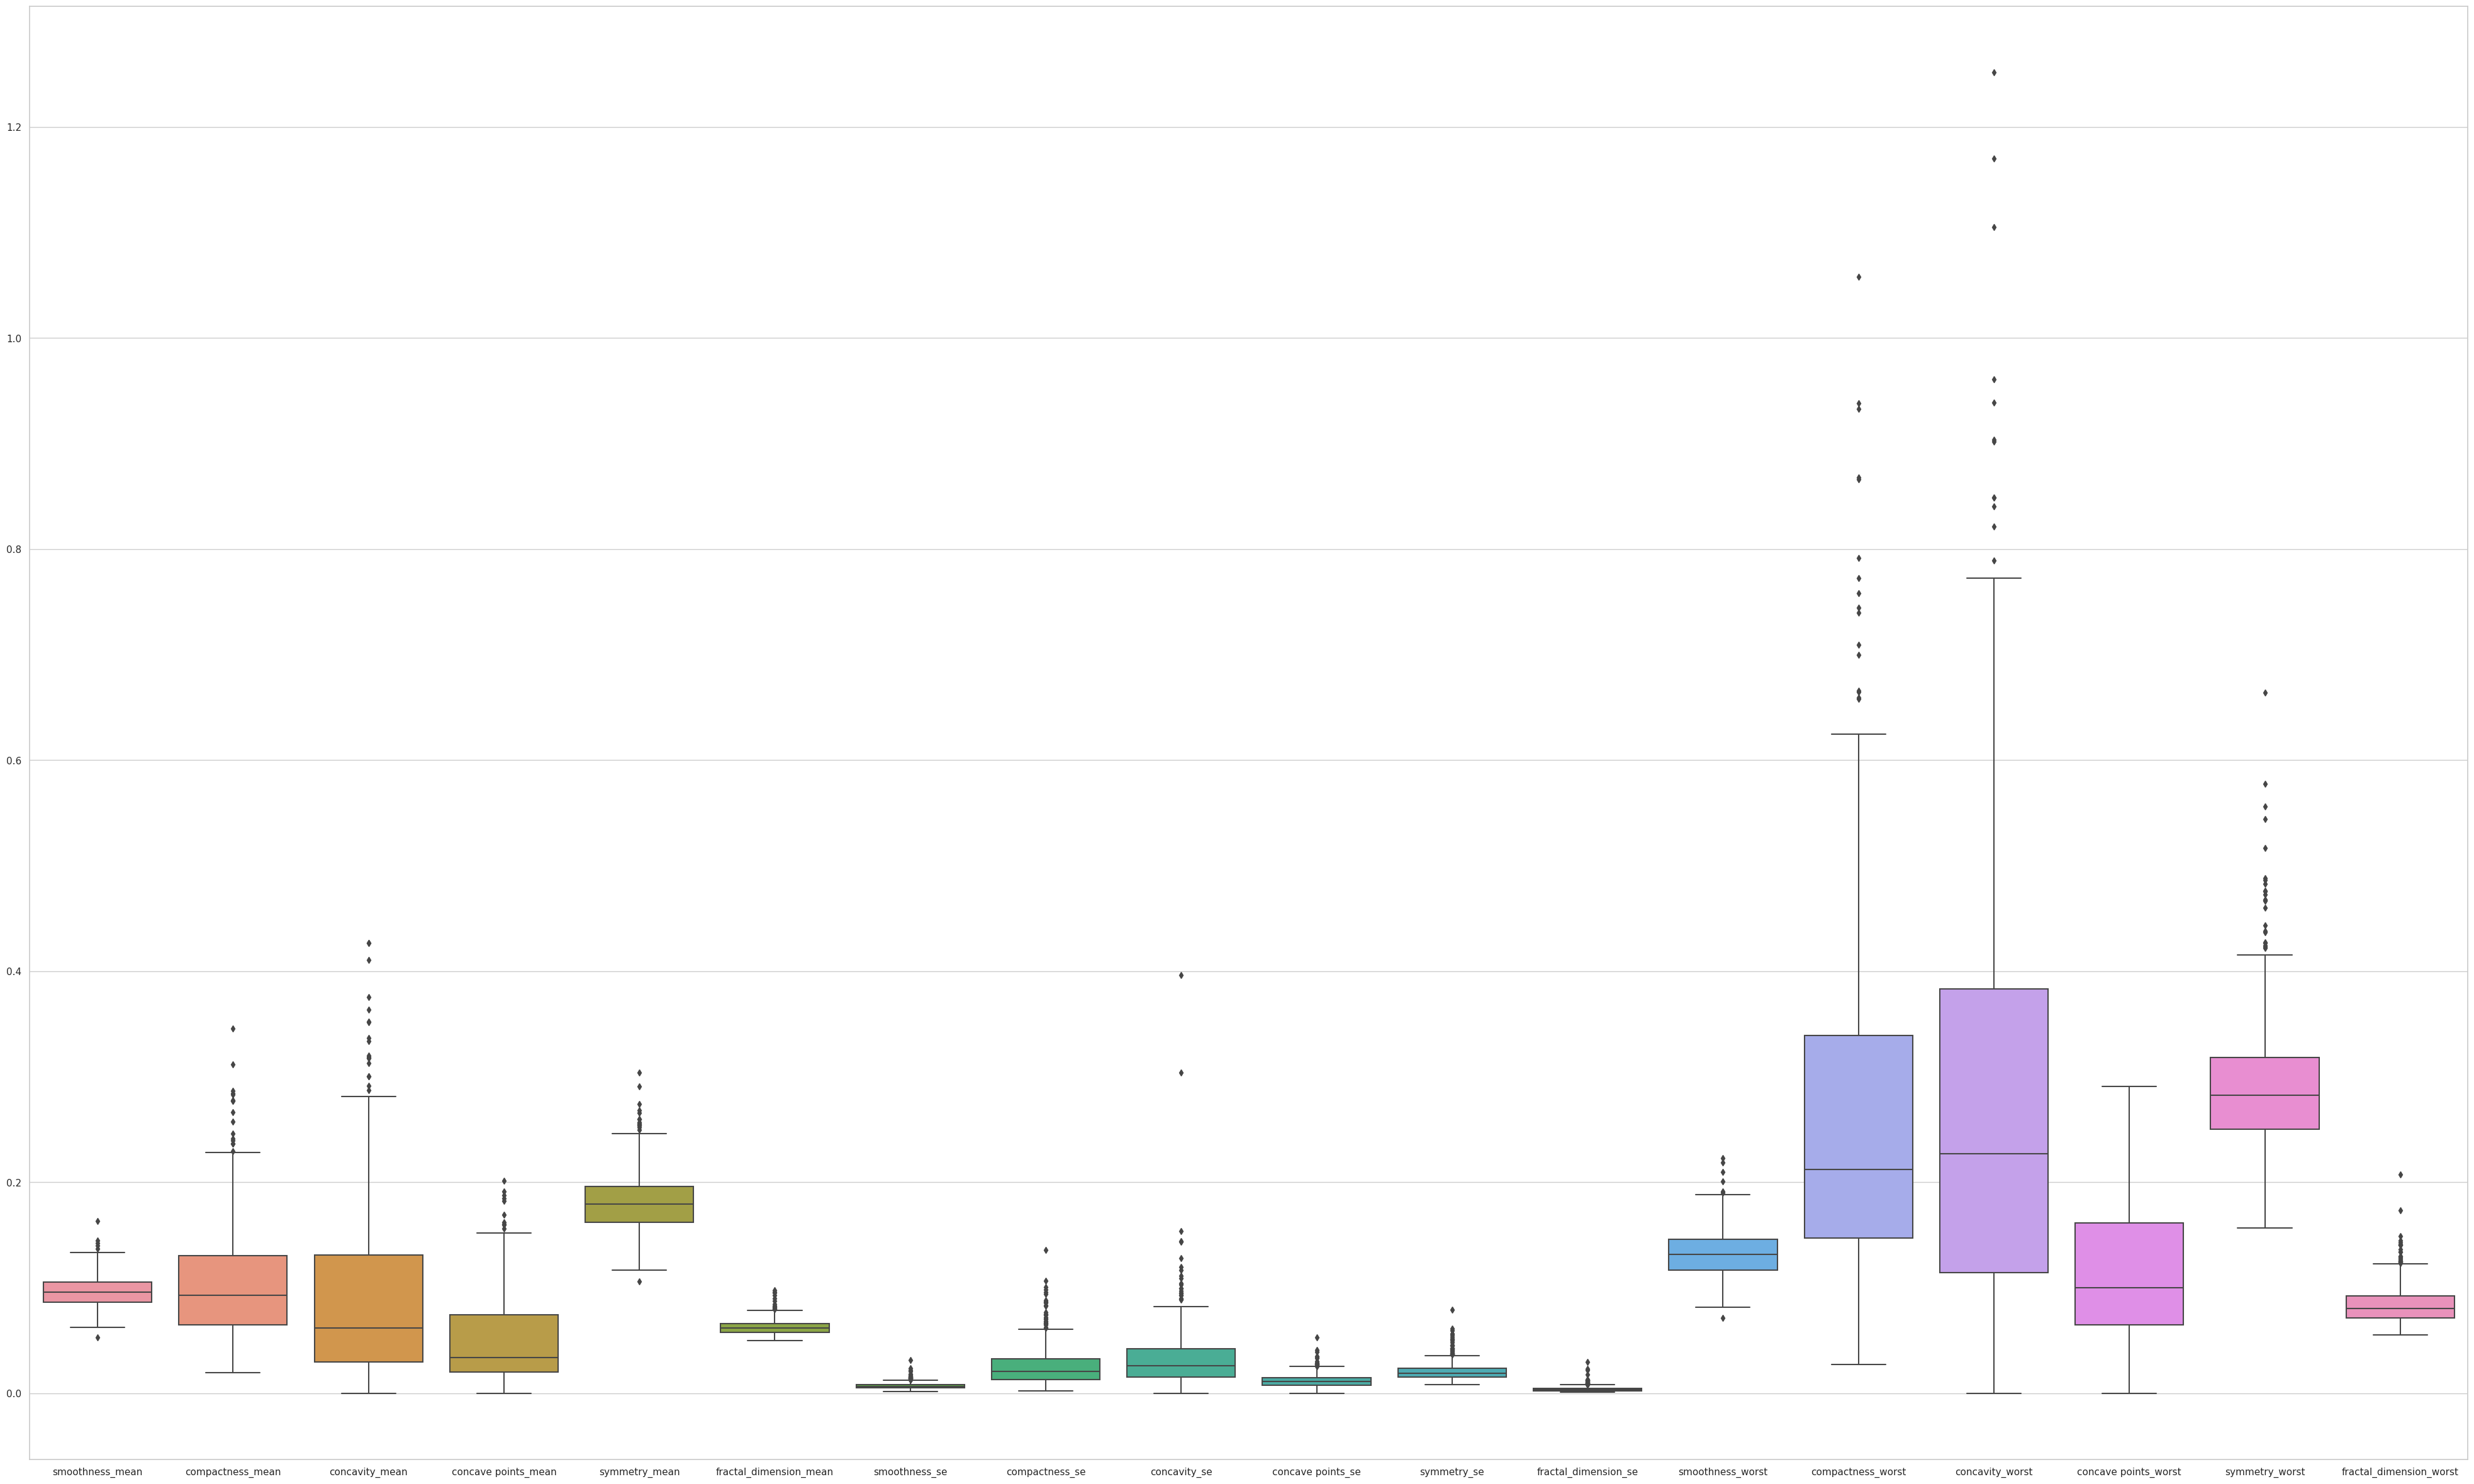

In [82]:
# Mengambil sampel beberapa kolom yang ingin dilihat distribusinya
kolom_distribusi = df[list(df.columns[1:])]

# Membuat displot menggunakan Seaborn
plt.figure(figsize=(50, 30))
sns.set(style="whitegrid")  # Opsi lain untuk gaya: "darkgrid", "white", "ticks", dll.
sns.boxplot(data=kolom_distribusi)  # Anda dapat mengatur jumlah bins sesuai kebutuhan
plt.show()

In [83]:
def find_outlier(yourlist):
    outlier = ''
    for i in range(len(yourlist)):
        if yourlist[i] > batas_atas:
            outlier += str(yourlist[i]) + ', '
        if yourlist[i] < batas_bawah:
            outlier += str(yourlist[i]) + ', '
    return outlier

for j in df[list(df.columns[1:])] :
    # Q1 = df[j].describe()['25%']
    Q1 = df[j].describe()[4]
    # print (df[j].describe() == 66)

    Q3 = df[j].describe()['75%']
    IQR = Q3 - Q1
    batas_bawah= Q1-(1.5*IQR)
    batas_atas = Q3+(1.5*IQR)
    if find_outlier(df[j]) == '':
        print('Feature {} has no Outlier'.format(j))
    else:
        print('Feature {} has {} Outlier which is:'.format(j, (len(find_outlier(df[j]).split(',')))-1))
        print(find_outlier(df[j]))

Feature smoothness_mean has 6 Outlier which is:
0.1425, 0.1398, 0.1447, 0.1634, 0.1371, 0.05263, 
Feature compactness_mean has 16 Outlier which is:
0.2776, 0.2839, 0.2396, 0.2458, 0.2293, 0.3454, 0.2665, 0.2768, 0.2867, 0.2832, 0.2413, 0.3114, 0.2364, 0.2363, 0.2576, 0.277, 
Feature concavity_mean has 18 Outlier which is:
0.3001, 0.313, 0.3754, 0.3339, 0.4264, 0.3003, 0.4268, 0.4108, 0.2871, 0.3523, 0.3201, 0.3176, 0.2914, 0.3368, 0.3189, 0.3635, 0.3174, 0.3514, 
Feature concave points_mean has 10 Outlier which is:
0.1604, 0.1845, 0.1823, 0.2012, 0.1878, 0.162, 0.1595, 0.1913, 0.1562, 0.1689, 
Feature symmetry_mean has 15 Outlier which is:
0.2597, 0.2521, 0.304, 0.2743, 0.2906, 0.2556, 0.2655, 0.2678, 0.254, 0.2548, 0.2495, 0.2595, 0.2569, 0.2538, 0.106, 
Feature fractal_dimension_mean has 15 Outlier which is:
0.09744, 0.08243, 0.08046, 0.0898, 0.08142, 0.08261, 0.09296, 0.08116, 0.08104, 0.08743, 0.0845, 0.0795, 0.09502, 0.09575, 0.07976, 
Feature smoothness_se has 30 Outlier which is

In [84]:

def find_outlier(yourlist):
    outliers = [str(x) for x in yourlist if x > batas_atas or x < batas_bawah]
    return ', '.join(outliers)

outlier_data = []

for j in df[list(df.columns[1:])]:
    Q1 = df[j].describe()[4]
    Q3 = df[j].describe()['75%']
    IQR = Q3 - Q1
    batas_bawah = Q1 - (1.5 * IQR)
    batas_atas = Q3 + (1.5 * IQR)
    outliers = find_outlier(df[j])

    status = 'No Outlier' if not outliers else 'Outlier'
    count = len(outliers.split(', ')) if outliers else 0
    outlier_data.append(['Feature', j, status, count, outliers])

outlier_df = pd.DataFrame(outlier_data, columns=['Type', 'Feature', 'Status', 'Count', 'Outliers'])
print(outlier_df)

       Type                  Feature      Status  Count  \
0   Feature          smoothness_mean     Outlier      6   
1   Feature         compactness_mean     Outlier     16   
2   Feature           concavity_mean     Outlier     18   
3   Feature      concave points_mean     Outlier     10   
4   Feature            symmetry_mean     Outlier     15   
5   Feature   fractal_dimension_mean     Outlier     15   
6   Feature            smoothness_se     Outlier     30   
7   Feature           compactness_se     Outlier     28   
8   Feature             concavity_se     Outlier     22   
9   Feature        concave points_se     Outlier     19   
10  Feature              symmetry_se     Outlier     27   
11  Feature     fractal_dimension_se     Outlier     28   
12  Feature         smoothness_worst     Outlier      7   
13  Feature        compactness_worst     Outlier     16   
14  Feature          concavity_worst     Outlier     12   
15  Feature     concave points_worst  No Outlier      0 

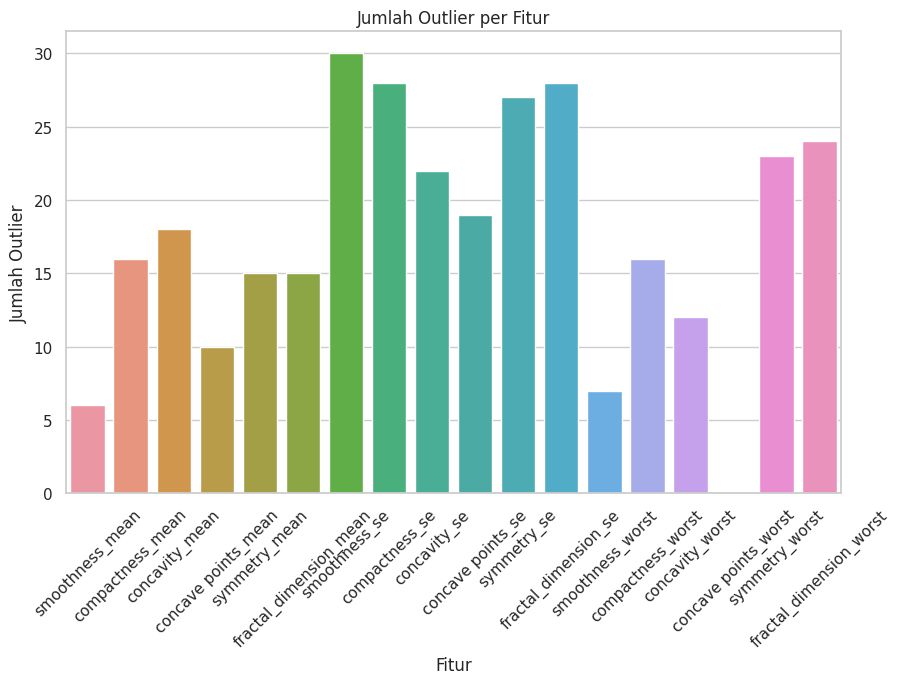

In [85]:

# Plot bar plot dengan Seaborndf[list (df.columns[1:])]
plt.figure(figsize=(10, 6))
sns.barplot(x='Feature', y='Count', data=outlier_df)
plt.title('Jumlah Outlier per Fitur')
plt.xlabel('Fitur')
plt.ylabel('Jumlah Outlier')
plt.xticks(rotation=45)
plt.show()

#### handling Outlayer

In [86]:
# Membuat salinan dataset
scaled_df = df.copy()

# Daftar fitur yang akan di-scale
features_to_scale = df.columns[1:]

In [87]:
scaled_df.head(2)

,diagnosis,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,smoothness_se,compactness_se,concavity_se,concave points_se,symmetry_se,fractal_dimension_se,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,M,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,0.006399,0.04904,0.05373,0.01587,0.03003,0.006193,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,M,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,0.005225,0.01308,0.01860,0.01340,0.01389,0.003532,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902


In [88]:
# Melakukan scaling menggunakan RobustScaler
robust_scaler = RobustScaler()
scaled_df[features_to_scale] = robust_scaler.fit_transform(df[features_to_scale])

# Menyimpan hasil scaling RobustScaler ke dalam dataframe baru
robust_df = scaled_df.copy()


In [89]:
robust_df.head(2)

,diagnosis,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,smoothness_se,compactness_se,concavity_se,concave points_se,symmetry_se,fractal_dimension_se,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,M,1.190174,2.824832,2.358711,2.115850,1.855030,2.039192,0.006382,1.475994,1.032641,0.698529,1.358173,1.301299,1.051020,2.364252,1.807750,1.715248,2.635556,1.884578
1,M,-0.587956,-0.213653,0.250742,0.682995,0.059172,-0.578385,-0.387974,-0.380485,-0.270401,0.349265,-0.581731,0.149351,-0.255102,-0.131839,0.055514,0.892194,-0.106667,0.435500


In [90]:
# Melakukan scaling menggunakan MinMaxScaler
minmax_scaler = MinMaxScaler()
scaled_df[features_to_scale] = minmax_scaler.fit_transform(df[features_to_scale])

# Menyimpan hasil scaling MinMaxScaler ke dalam dataframe baru
minmax_df = scaled_df.copy()

In [91]:
minmax_df.head(2)

,diagnosis,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,smoothness_se,compactness_se,concavity_se,concave points_se,symmetry_se,fractal_dimension_se,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,M,0.593753,0.792037,0.703140,0.731113,0.686364,0.605518,0.159296,0.351398,0.135682,0.300625,0.311645,0.183042,0.601136,0.619292,0.568610,0.912027,0.598462,0.418864
1,M,0.289880,0.181768,0.203608,0.348757,0.379798,0.141323,0.119387,0.081323,0.046970,0.253836,0.084539,0.091110,0.347553,0.154563,0.192971,0.639175,0.233590,0.222878


In [92]:

# Melakukan scaling menggunakan StandardScaler
standard_scaler = StandardScaler()
scaled_df[features_to_scale] = standard_scaler.fit_transform(df[features_to_scale])

# Menyimpan hasil scaling StandardScaler ke dalam dataframe baru
standard_df = scaled_df.copy()

In [93]:
standard_df.head(2)

,diagnosis,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,smoothness_se,compactness_se,concavity_se,concave points_se,symmetry_se,fractal_dimension_se,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,M,1.568466,3.283515,2.652874,2.532475,2.217515,2.255747,-0.214002,1.316862,0.724026,0.660820,1.148757,0.907083,1.307686,2.616665,2.109526,2.296076,2.750622,1.937015
1,M,-0.826962,-0.487072,-0.023846,0.548144,0.001392,-0.868652,-0.605351,-0.692926,-0.440780,0.260162,-0.805450,-0.099444,-0.375612,-0.430444,-0.146749,1.087084,-0.243890,0.281190


### Encoding

In [94]:
lE = LabelEncoder()
df['diagnosis'] = lE.fit_transform(df['diagnosis'])

In [95]:
# 1: M
# 0: B
df.head(5)

,diagnosis,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,smoothness_se,compactness_se,concavity_se,concave points_se,symmetry_se,fractal_dimension_se,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,1,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,0.006399,0.04904,0.05373,0.01587,0.03003,0.006193,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,1,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,0.005225,0.01308,0.01860,0.01340,0.01389,0.003532,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,1,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,0.006150,0.04006,0.03832,0.02058,0.02250,0.004571,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,0.009110,0.07458,0.05661,0.01867,0.05963,0.009208,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,1,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,0.011490,0.02461,0.05688,0.01885,0.01756,0.005115,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [96]:
df.shape

(569, 19)

### Model Klasifikasi

In [191]:
scores = []

#### Model KLasifikasi dengan Robust

In [192]:
# Bagi dataset menjadi train dan test (90% - 10%)
X = robust_df[list(robust_df.columns[1:])]
y = robust_df[list(robust_df.columns[0:1])].values.ravel()
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=789)


In [193]:
X.head()

,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,smoothness_se,compactness_se,concavity_se,concave points_se,symmetry_se,fractal_dimension_se,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,1.190174,2.824832,2.358711,2.115850,1.855030,2.039192,0.006382,1.475994,1.032641,0.698529,1.358173,1.301299,1.051020,2.364252,1.807750,1.715248,2.635556,1.884578
1,-0.587956,-0.213653,0.250742,0.682995,0.059172,-0.578385,-0.387974,-0.380485,-0.270401,0.349265,-0.581731,0.149351,-0.255102,-0.131839,0.055514,0.892194,-0.106667,0.435500
2,0.725304,1.027337,1.343287,1.758242,0.819527,-0.184086,-0.077259,1.012390,0.461053,1.364536,0.453125,0.599134,0.445578,1.107869,0.833458,1.483052,1.171852,0.365664
3,2.463286,2.921045,1.778327,1.335444,2.381657,4.263658,0.917031,2.794528,1.139466,1.094457,4.915865,2.606494,2.670068,3.410109,1.714605,1.633358,5.653333,4.508244
4,0.234020,0.613470,1.349219,1.318681,0.050296,-0.321853,1.716493,0.214765,1.149481,1.119910,-0.140625,0.834632,0.207483,-0.035956,0.645678,0.648595,-0.678519,-0.158099


In [194]:
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(512, 18)
(512,)
(57, 18)
(57,)


Tunning

In [195]:
model_params = {
    'svm': {
        'model': svm.SVC(random_state=789, gamma='auto'),
        'params' : {
            'gamma' : ['auto','scale'],
            'C': [1,10,20],
            'kernel': ['rbf','linear','poly','sigmoid']
        }
    },
    'random_forest': {
        'model': RandomForestClassifier(random_state=789),
        'params' : {
            'n_estimators': [1,5,10]
        }
    },
    'logistic_regression' : {
        'model': LogisticRegression(solver='liblinear',multi_class='auto'),
        'params': {
            'C': [1,5,10]
        }
    },
    'Decision_Tree' : {
        'model': DecisionTreeClassifier(random_state=789),
        'params': {
            'criterion': ["gini","entropy"],
            'max_depth' : range(1,10),
            'min_samples_leaf': range(2,10)
        }
    },
    'KNN' :{
        'model' : KNeighborsClassifier(),
        'params' : {
            'n_neighbors': [1, 2, 3, 4, 5],
            'weights': ['uniform', 'distance']
        }
    }
}



for model_name, mp in model_params.items():
    clf =  GridSearchCV(mp['model'], mp['params'], cv=5, return_train_score=False)
    clf.fit(X_train, y_train)
    best_model = clf.best_estimator_
    y_pred = best_model.predict(X_test)
    cm = confusion_matrix(y_test, y_pred)

    scores.append({
        'model': model_name,
        'best_score': clf.best_score_,
        'best_params': clf.best_params_,
        'scaller': 'Robust',
        'Confusion_Matrix': cm
    })


In [196]:
model_params2 = {
    'svm': {
        'model': svm.SVC(random_state=789),
        'params' : {
        }
    },
    'random_forest': {
        'model': RandomForestClassifier(random_state=789),
        'params' : {
        }
    },
    'logistic_regression' : {
        'model': LogisticRegression(),
        'params': {
        }
    },
    'Decision_Tree' : {
        'model': DecisionTreeClassifier(random_state=789),
        'params': {
        }
    },
    'KNN' :{
        'model': KNeighborsClassifier(),
        'params': {
        }
    }
}

In [197]:

for model_name, mp in model_params2.items():
  seed = 789
  clf =  mp['model']
  print(model_name)
  print (clf)
  clf.fit(X_train, y_train)
  y_pred = clf.predict(X_test)
  accuracy = accuracy_score(y_test, y_pred)
  cm = confusion_matrix(y_test, y_pred)
  print (accuracy)
  print(cm)

  scores.append({
        'model': model_name,
        'best_score': accuracy,
        'best_params': "default",
        'scaller': 'Robust',
        'Confusion_Matrix': cm
    })

result = pd.DataFrame(scores,columns=['model','best_score','best_params', 'scaller', 'Confusion_Matrix'])
result

svm
SVC(random_state=789)
0.9298245614035088
[[31  1]
 [ 3 22]]
random_forest
RandomForestClassifier(random_state=789)
0.9298245614035088
[[31  1]
 [ 3 22]]
logistic_regression
LogisticRegression()
0.9298245614035088
[[31  1]
 [ 3 22]]
Decision_Tree
DecisionTreeClassifier(random_state=789)
0.9298245614035088
[[30  2]
 [ 2 23]]
KNN
KNeighborsClassifier()
0.9298245614035088
[[31  1]
 [ 3 22]]


,model,best_score,best_params,scaller,Confusion_Matrix
0,svm,0.943385,"{'C': 10, 'gamma': 'auto', 'kernel': 'linear'}",Robust,"[[31, 1], [4, 21]]"
1,random_forest,0.939406,{'n_estimators': 10},Robust,"[[31, 1], [3, 22]]"
2,logistic_regression,0.943347,{'C': 1},Robust,"[[31, 1], [3, 22]]"
3,Decision_Tree,0.933524,"{'criterion': 'gini', 'max_depth': 6, 'min_sam...",Robust,"[[31, 1], [3, 22]]"
4,KNN,0.929678,"{'n_neighbors': 3, 'weights': 'uniform'}",Robust,"[[29, 3], [3, 22]]"
5,svm,0.929825,default,Robust,"[[31, 1], [3, 22]]"
6,random_forest,0.929825,default,Robust,"[[31, 1], [3, 22]]"
7,logistic_regression,0.929825,default,Robust,"[[31, 1], [3, 22]]"
8,Decision_Tree,0.929825,default,Robust,"[[30, 2], [2, 23]]"
9,KNN,0.929825,default,Robust,"[[31, 1], [3, 22]]"


##### Detail Model

###### Tree

In [198]:
# Define model Decision Tree
tree_model = DecisionTreeClassifier(random_state=789)

# Train model Decision Tree tanpa tuning parameter
tree_model.fit(X_train, y_train)
y_pred_tree = tree_model.predict(X_test)
accuracy_tree = accuracy_score(y_test, y_pred_tree)
print("Accuracy Decision Tree tanpa tuning parameter:", accuracy_tree)
confusion_matrix_tree = confusion_matrix(y_test, y_pred_tree)
print (confusion_matrix_tree)

Accuracy Decision Tree tanpa tuning parameter: 0.9298245614035088
[[30  2]
 [ 2 23]]


In [199]:

# Tuning parameter Decision Tree dengan Randomized Search CV
param_dist_tree = { 'criterion': ["gini","entropy"],
                    'max_depth' : range(1,10),
                    'min_samples_leaf': range(2,10)}
random_search_tree = RandomizedSearchCV(tree_model, param_distributions=param_dist_tree, n_iter=10, cv=5)
random_search_tree.fit(X_train, y_train)
best_tree_model = random_search_tree.best_estimator_
best_tree_model.fit(X_train, y_train)
y_pred_tree_best = best_tree_model.predict(X_test)
accuracy_tree_best = accuracy_score(y_test, y_pred_tree_best)
print("Accuracy Decision Tree dengan tuning parameter:", accuracy_tree_best)
confusion_matrix_tree_best = confusion_matrix(y_test, y_pred_tree_best)
print (confusion_matrix_tree_best)

Accuracy Decision Tree dengan tuning parameter: 0.9298245614035088
[[30  2]
 [ 2 23]]


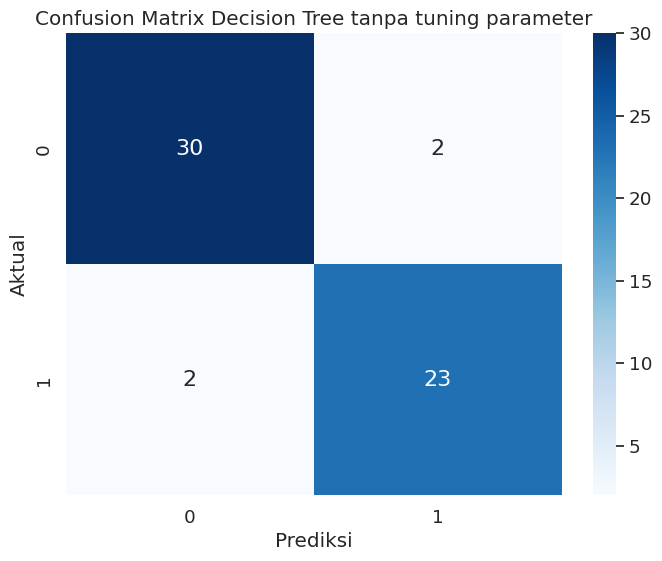

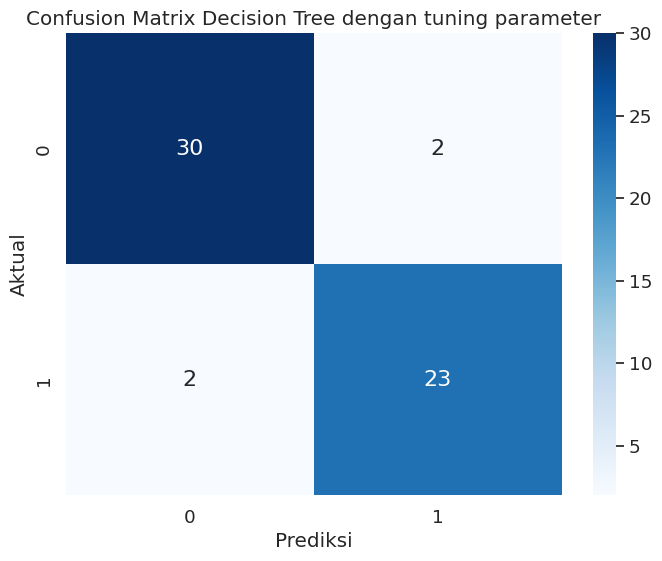

In [200]:
# Visualisasi Confusion Matrix dengan Seaborn
plt.figure(figsize=(8, 6))
sns.set(font_scale=1.2)  # Atur skala font
sns.heatmap(confusion_matrix_tree, annot=True, fmt="d", cmap="Blues", annot_kws={"size": 16})

plt.xlabel('Prediksi')
plt.ylabel('Aktual')
plt.title('Confusion Matrix Decision Tree tanpa tuning parameter')
plt.show()

plt.figure(figsize=(8, 6))
sns.set(font_scale=1.2)  # Atur skala font
sns.heatmap(confusion_matrix_tree_best, annot=True, fmt="d", cmap="Blues", annot_kws={"size": 16})

plt.xlabel('Prediksi')
plt.ylabel('Aktual')
plt.title('Confusion Matrix Decision Tree dengan tuning parameter')
plt.show()

###### KNN

In [201]:
# Define model K-Nearest Neighbors (KNN)
knn_model = KNeighborsClassifier()

# Train model KNN tanpa tuning parameter
knn_model.fit(X_train, y_train)
y_pred_knn = knn_model.predict(X_test)
accuracy_knn = accuracy_score(y_test, y_pred_knn)
print("Accuracy KNN tanpa tuning parameter:", accuracy_knn)
confusion_matrix_knn = confusion_matrix(y_test, y_pred_knn)
print (confusion_matrix_knn)

Accuracy KNN tanpa tuning parameter: 0.9298245614035088
[[31  1]
 [ 3 22]]


In [202]:

# Tuning parameter KNN dengan Grid Search CV
param_grid_knn = {'n_neighbors': [1, 2, 3, 4, 5],
                  'weights': ['uniform', 'distance']}
grid_search_knn = GridSearchCV(knn_model, param_grid_knn, cv=5)
grid_search_knn.fit(X_train, y_train)
best_knn_model = grid_search_knn.best_estimator_
best_knn_model.fit(X_train, y_train)
y_pred_knn_best = best_knn_model.predict(X_test)
accuracy_knn_best = accuracy_score(y_test, y_pred_knn_best)

# Evaluasi hasil untuk model Decision knn dan KNN
print("Accuracy KNN dengan tuning parameter:", accuracy_knn_best)
confusion_matrix_knn_best = confusion_matrix(y_test, y_pred_knn_best)
print (confusion_matrix_knn_best)

Accuracy KNN dengan tuning parameter: 0.8947368421052632
[[29  3]
 [ 3 22]]


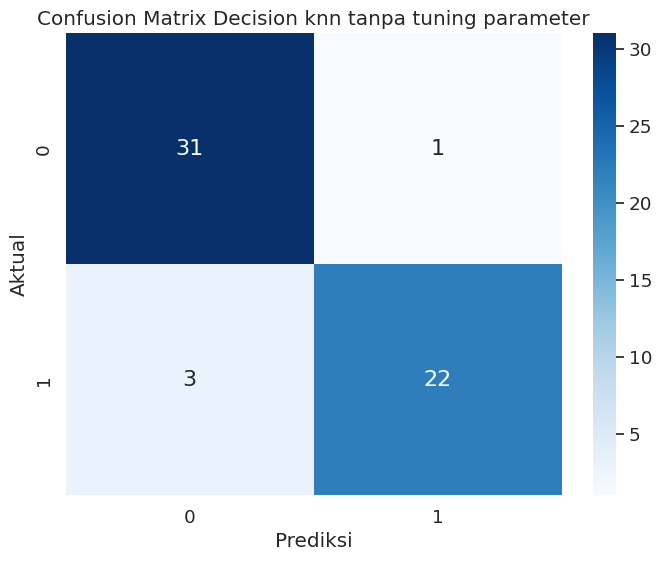

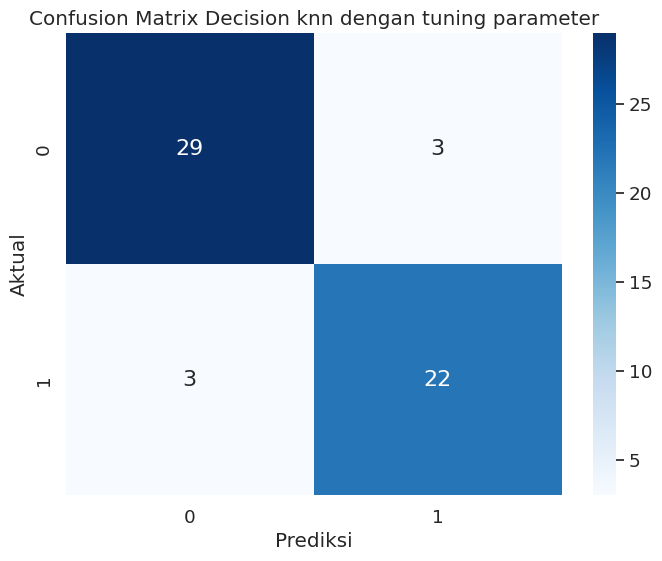

In [203]:
# Visualisasi Confusion Matrix dengan Seaborn
plt.figure(figsize=(8, 6))
sns.set(font_scale=1.2)  # Atur skala font
sns.heatmap(confusion_matrix_knn, annot=True, fmt="d", cmap="Blues", annot_kws={"size": 16})

plt.xlabel('Prediksi')
plt.ylabel('Aktual')
plt.title('Confusion Matrix Decision knn tanpa tuning parameter')
plt.show()

plt.figure(figsize=(8, 6))
sns.set(font_scale=1.2)  # Atur skala font
sns.heatmap(confusion_matrix_knn_best, annot=True, fmt="d", cmap="Blues", annot_kws={"size": 16})

plt.xlabel('Prediksi')
plt.ylabel('Aktual')
plt.title('Confusion Matrix Decision knn dengan tuning parameter')
plt.show()

###### SVM

In [204]:
# Define model SVM
svm_model = SVC(random_state=789)

# Train model SVM tanpa tuning parameter
svm_model.fit(X_train, y_train)
y_pred_svm = svm_model.predict(X_test)
accuracy_svm = accuracy_score(y_test, y_pred_svm)
print("Accuracy SVM tanpa tuning parameter:", accuracy_svm)
confusion_matrix_svm = confusion_matrix(y_test, y_pred_svm)
print (confusion_matrix_svm)

Accuracy SVM tanpa tuning parameter: 0.9298245614035088
[[31  1]
 [ 3 22]]


In [205]:
# Tuning parameter SVM dengan Grid Search CV atau Randomized Search CV
param_grid_svm = {
            'gamma' : ['auto','scale'],
            'C': [1,10,20],
            'kernel': ['rbf','linear','poly','sigmoid']
}

grid_search_svm = GridSearchCV(svm_model, param_grid_svm, cv=5)
grid_search_svm.fit(X_train, y_train)
best_svm_model = grid_search_svm.best_estimator_
best_svm_model.fit(X_train, y_train)
y_pred_svm_best = best_svm_model.predict(X_test)
accuracy_svm_best = accuracy_score(y_test, y_pred_svm_best)

# Evaluasi hasil untuk model SVM
print("Accuracy SVM dengan tuning parameter:", accuracy_svm_best)
confusion_matrix_svm_best = confusion_matrix(y_test, y_pred_svm_best)
print (confusion_matrix_svm_best)

Accuracy SVM dengan tuning parameter: 0.9122807017543859
[[31  1]
 [ 4 21]]


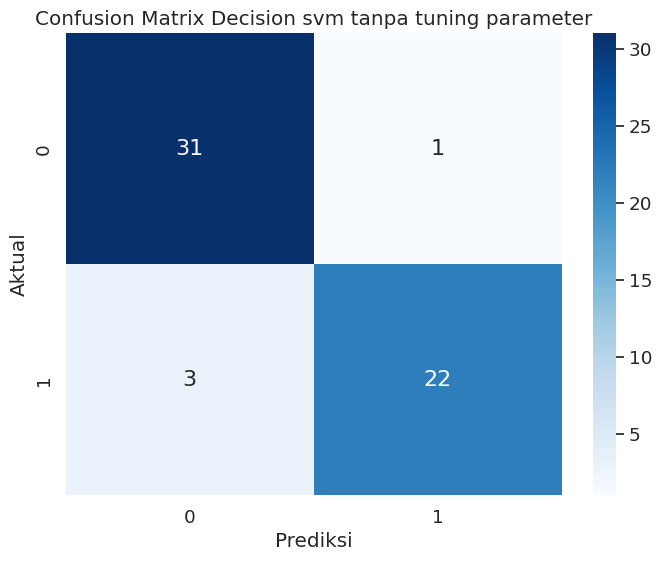

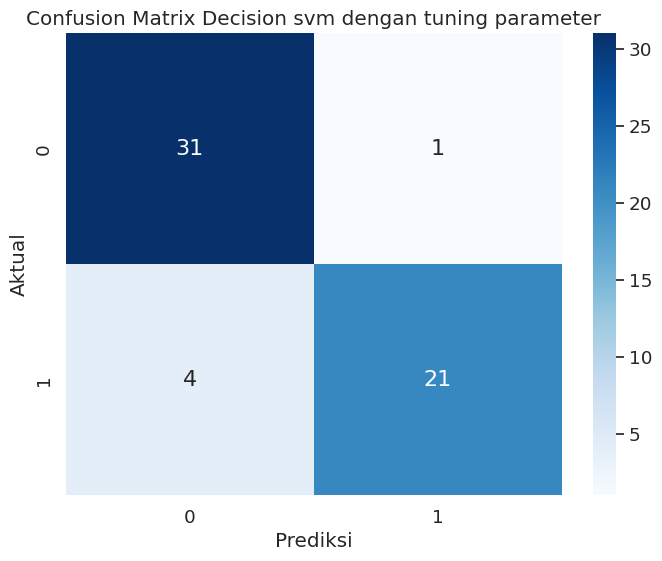

In [206]:
# Visualisasi Confusion Matrix dengan Seaborn
plt.figure(figsize=(8, 6))
sns.set(font_scale=1.2)  # Atur skala font
sns.heatmap(confusion_matrix_svm, annot=True, fmt="d", cmap="Blues", annot_kws={"size": 16})

plt.xlabel('Prediksi')
plt.ylabel('Aktual')
plt.title('Confusion Matrix Decision svm tanpa tuning parameter')
plt.show()

plt.figure(figsize=(8, 6))
sns.set(font_scale=1.2)  # Atur skala font
sns.heatmap(confusion_matrix_svm_best, annot=True, fmt="d", cmap="Blues", annot_kws={"size": 16})

plt.xlabel('Prediksi')
plt.ylabel('Aktual')
plt.title('Confusion Matrix Decision svm dengan tuning parameter')
plt.show()

###### Forest

In [207]:
# Define model Random Forest
rf_model = RandomForestClassifier(random_state=789)

# Train model Random Forest tanpa tuning parameter
rf_model.fit(X_train, y_train)
y_pred_rf = rf_model.predict(X_test)
accuracy_rf = accuracy_score(y_test, y_pred_rf)
print("Accuracy Random Forest tanpa tuning parameter:", accuracy_rf)
confusion_matrix_rf = confusion_matrix(y_test, y_pred_rf)
print (confusion_matrix_rf)

Accuracy Random Forest tanpa tuning parameter: 0.9298245614035088
[[31  1]
 [ 3 22]]


In [208]:
# Tuning parameter Random Forest dengan Grid Search CV
param_grid_rf = {
    'n_estimators': [1,5,10]
}

grid_search_rf = GridSearchCV(rf_model, param_grid_rf, cv=5)
grid_search_rf.fit(X_train, y_train)
best_rf_model = grid_search_rf.best_estimator_
best_rf_model.fit(X_train, y_train)
y_pred_rf_best = best_rf_model.predict(X_test)
accuracy_rf_best = accuracy_score(y_test, y_pred_rf_best)

# Evaluasi hasil untuk model Random Forest
print("Accuracy Random Forest dengan tuning parameter:", accuracy_rf_best)
confusion_matrix_rf_best = confusion_matrix(y_test, y_pred_rf_best)
print(confusion_matrix_rf_best)

Accuracy Random Forest dengan tuning parameter: 0.9298245614035088
[[31  1]
 [ 3 22]]


###### Regresi Logistik

In [209]:
# Define model Regresi Logistik
rl_model = LogisticRegression(random_state=789)

# Train model Regresi Logistik tanpa tuning parameter
rl_model.fit(X_train, y_train)
y_pred_rl = rl_model.predict(X_test)
accuracy_rl = accuracy_score(y_test, y_pred_rl)
print("Accuracy Regresi Logistik tanpa tuning parameter:", accuracy_rl)
confusion_matrix_rl = confusion_matrix(y_test, y_pred_rl)
print (confusion_matrix_rl)

Accuracy Regresi Logistik tanpa tuning parameter: 0.9298245614035088
[[31  1]
 [ 3 22]]


In [210]:
# Tuning parameter Regresi Logistik dengan Grid Search CV atau Randomized Search CV
param_grid_rl = {
    'C': [1,5,10]
}

grid_search_rl = GridSearchCV(rl_model, param_grid_rl, cv=5)
grid_search_rl.fit(X_train, y_train)
best_rl_model = grid_search_rl.best_estimator_
best_rl_model.fit(X_train, y_train)
y_pred_rl_best = best_rl_model.predict(X_test)
accuracy_rl_best = accuracy_score(y_test, y_pred_rl_best)

# Evaluasi hasil untuk model Regresi Logistik
print("Accuracy Regresi Logistik dengan tuning parameter:", accuracy_rl_best)
confusion_matrix_rl_best = confusion_matrix(y_test, y_pred_rl_best)
print (confusion_matrix_rl_best)

Accuracy Regresi Logistik dengan tuning parameter: 0.9298245614035088
[[31  1]
 [ 3 22]]


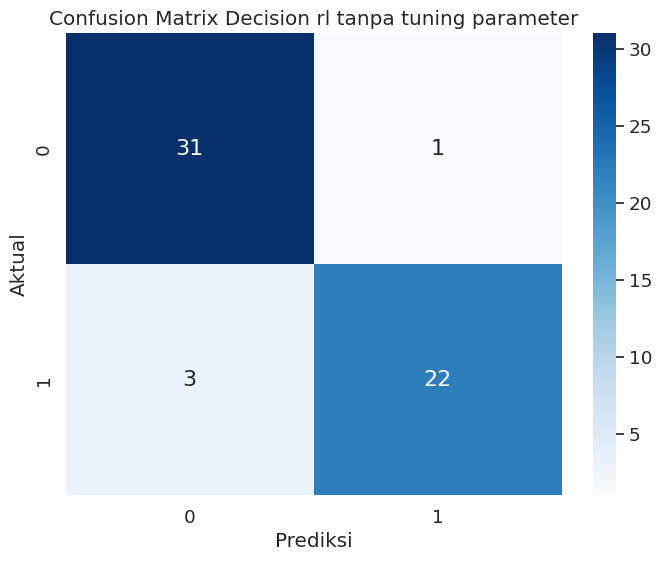

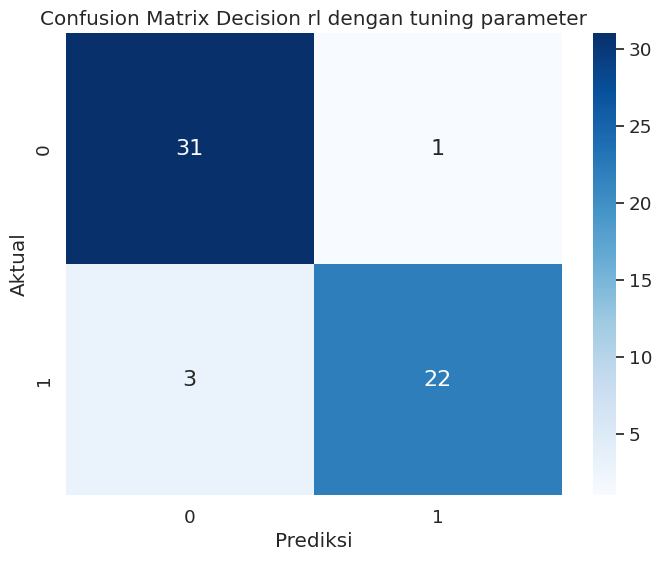

In [211]:
# Visualisasi Confusion Matrix dengan Seaborn
plt.figure(figsize=(8, 6))
sns.set(font_scale=1.2)  # Atur skala font
sns.heatmap(confusion_matrix_rl, annot=True, fmt="d", cmap="Blues", annot_kws={"size": 16})

plt.xlabel('Prediksi')
plt.ylabel('Aktual')
plt.title('Confusion Matrix Decision rl tanpa tuning parameter')
plt.show()

plt.figure(figsize=(8, 6))
sns.set(font_scale=1.2)  # Atur skala font
sns.heatmap(confusion_matrix_rl_best, annot=True, fmt="d", cmap="Blues", annot_kws={"size": 16})

plt.xlabel('Prediksi')
plt.ylabel('Aktual')
plt.title('Confusion Matrix Decision rl dengan tuning parameter')
plt.show()

#### Model KLasifikasi dengan Minmax

In [212]:
# Bagi dataset menjadi train dan test (90% - 10%)
X = minmax_df[list(minmax_df.columns[1:])]
y = minmax_df[list(minmax_df.columns[0:1])].values.ravel()
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=789)


In [213]:
X.head()

,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,smoothness_se,compactness_se,concavity_se,concave points_se,symmetry_se,fractal_dimension_se,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,0.593753,0.792037,0.703140,0.731113,0.686364,0.605518,0.159296,0.351398,0.135682,0.300625,0.311645,0.183042,0.601136,0.619292,0.568610,0.912027,0.598462,0.418864
1,0.289880,0.181768,0.203608,0.348757,0.379798,0.141323,0.119387,0.081323,0.046970,0.253836,0.084539,0.091110,0.347553,0.154563,0.192971,0.639175,0.233590,0.222878
2,0.514309,0.431017,0.462512,0.635686,0.509596,0.211247,0.150831,0.283955,0.096768,0.389847,0.205690,0.127006,0.483590,0.385375,0.359744,0.835052,0.403706,0.213433
3,0.811321,0.811361,0.565604,0.522863,0.776263,1.000000,0.251453,0.543215,0.142955,0.353665,0.728148,0.287205,0.915472,0.814012,0.548642,0.884880,1.000000,0.773711
4,0.430351,0.347893,0.463918,0.518390,0.378283,0.186816,0.332359,0.167918,0.143636,0.357075,0.136179,0.145800,0.437364,0.172415,0.319489,0.558419,0.157500,0.142595


In [214]:
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(512, 18)
(512,)
(57, 18)
(57,)


Tunning

In [215]:
model_params = {
    'svm': {
        'model': svm.SVC(random_state=789, gamma='auto'),
        'params' : {
            'gamma' : ['auto','scale'],
            'C': [1,10,20],
            'kernel': ['rbf','linear','poly','sigmoid']
        }
    },
    'random_forest': {
        'model': RandomForestClassifier(random_state=789),
        'params' : {
            'n_estimators': [1,5,10]
        }
    },
    'logistic_regression' : {
        'model': LogisticRegression(solver='liblinear',multi_class='auto'),
        'params': {
            'C': [1,5,10]
        }
    },
    'Decision_Tree' : {
        'model': DecisionTreeClassifier(random_state=789),
        'params': {
            'criterion': ["gini","entropy"],
            'max_depth' : range(1,10),
            'min_samples_leaf': range(2,10)
        }
    },
    'KNN' :{
        'model' : KNeighborsClassifier(),
        'params' : {
            'n_neighbors': [1, 2, 3, 4, 5],
            'weights': ['uniform', 'distance']
        }
    }
}


for model_name, mp in model_params.items():
    clf =  GridSearchCV(mp['model'], mp['params'], cv=5, return_train_score=False)
    clf.fit(X_train, y_train)
    best_model = clf.best_estimator_
    y_pred = best_model.predict(X_test)
    cm = confusion_matrix(y_test, y_pred)
    scores.append({
        'model': model_name,
        'best_score': clf.best_score_,
        'best_params': clf.best_params_,
        'scaller': 'Minmax',
        'Confusion_Matrix': cm
    })



In [216]:
model_params2 = {
    'svm': {
        'model': svm.SVC(random_state=789),
        'params' : {
        }
    },
    'random_forest': {
        'model': RandomForestClassifier(random_state=789),
        'params' : {
        }
    },
    'logistic_regression' : {
        'model': LogisticRegression(),
        'params': {
        }
    },
    'Decision_Tree' : {
        'model': DecisionTreeClassifier(random_state=789),
        'params': {
        }
    },
    'KNN' :{
        'model': KNeighborsClassifier(),
        'params': {
        }
    }
}

In [217]:

for model_name, mp in model_params2.items():
  seed = 789
  clf =  mp['model']
  print(model_name)
  print (clf)
  clf.fit(X_train, y_train)
  y_pred = clf.predict(X_test)
  accuracy = accuracy_score(y_test, y_pred)
  cm = confusion_matrix(y_test, y_pred)
  print (accuracy)
  print(cm)

  scores.append({
        'model': model_name,
        'best_score': accuracy,
        'best_params': "default",
        'scaller': 'Minmax',
        'Confusion_Matrix': cm
    })

result = pd.DataFrame(scores,columns=['model','best_score','best_params', 'scaller', 'Confusion_Matrix'])
result

svm
SVC(random_state=789)
0.9298245614035088
[[31  1]
 [ 3 22]]
random_forest
RandomForestClassifier(random_state=789)
0.9298245614035088
[[31  1]
 [ 3 22]]
logistic_regression
LogisticRegression()
0.9298245614035088
[[31  1]
 [ 3 22]]
Decision_Tree
DecisionTreeClassifier(random_state=789)
0.9298245614035088
[[30  2]
 [ 2 23]]
KNN
KNeighborsClassifier()
0.8947368421052632
[[29  3]
 [ 3 22]]


,model,best_score,best_params,scaller,Confusion_Matrix
0,svm,0.943385,"{'C': 10, 'gamma': 'auto', 'kernel': 'linear'}",Robust,"[[31, 1], [4, 21]]"
1,random_forest,0.939406,{'n_estimators': 10},Robust,"[[31, 1], [3, 22]]"
2,logistic_regression,0.943347,{'C': 1},Robust,"[[31, 1], [3, 22]]"
3,Decision_Tree,0.933524,"{'criterion': 'gini', 'max_depth': 6, 'min_sam...",Robust,"[[31, 1], [3, 22]]"
4,KNN,0.929678,"{'n_neighbors': 3, 'weights': 'uniform'}",Robust,"[[29, 3], [3, 22]]"
5,svm,0.929825,default,Robust,"[[31, 1], [3, 22]]"
6,random_forest,0.929825,default,Robust,"[[31, 1], [3, 22]]"
7,logistic_regression,0.929825,default,Robust,"[[31, 1], [3, 22]]"
8,Decision_Tree,0.929825,default,Robust,"[[30, 2], [2, 23]]"
9,KNN,0.929825,default,Robust,"[[31, 1], [3, 22]]"


##### Detail Model

###### Tree

In [218]:
# Define model Decision Tree
tree_model = DecisionTreeClassifier(random_state=789)

# Train model Decision Tree tanpa tuning parameter
tree_model.fit(X_train, y_train)
y_pred_tree = tree_model.predict(X_test)
accuracy_tree = accuracy_score(y_test, y_pred_tree)
print("Accuracy Decision Tree tanpa tuning parameter:", accuracy_tree)
confusion_matrix_tree = confusion_matrix(y_test, y_pred_tree)
print (confusion_matrix_tree)

Accuracy Decision Tree tanpa tuning parameter: 0.9298245614035088
[[30  2]
 [ 2 23]]


In [219]:

# Tuning parameter Decision Tree dengan Randomized Search CV
param_dist_tree = { 'criterion': ["gini","entropy"],
                    'max_depth' : range(1,10),
                    'min_samples_leaf': range(2,10)}
random_search_tree = RandomizedSearchCV(tree_model, param_distributions=param_dist_tree, n_iter=10, cv=5)
random_search_tree.fit(X_train, y_train)
best_tree_model = random_search_tree.best_estimator_
best_tree_model.fit(X_train, y_train)
y_pred_tree_best = best_tree_model.predict(X_test)
accuracy_tree_best = accuracy_score(y_test, y_pred_tree_best)
print("Accuracy Decision Tree dengan tuning parameter:", accuracy_tree_best)
confusion_matrix_tree_best = confusion_matrix(y_test, y_pred_tree_best)
print (confusion_matrix_tree_best)

Accuracy Decision Tree dengan tuning parameter: 0.9298245614035088
[[31  1]
 [ 3 22]]


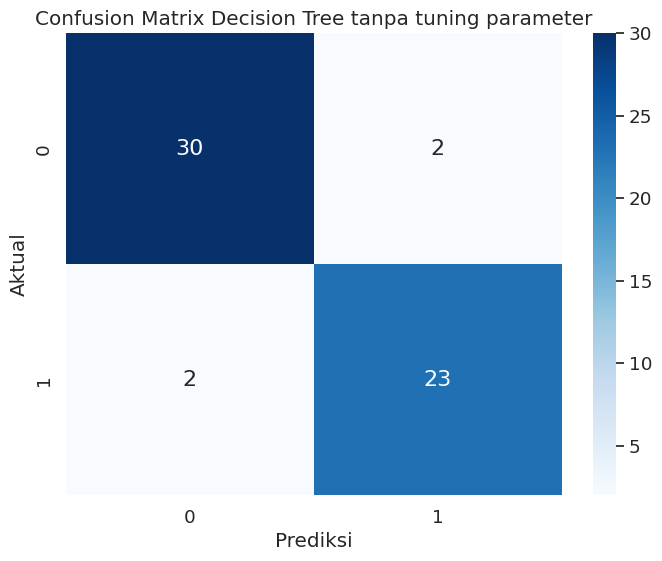

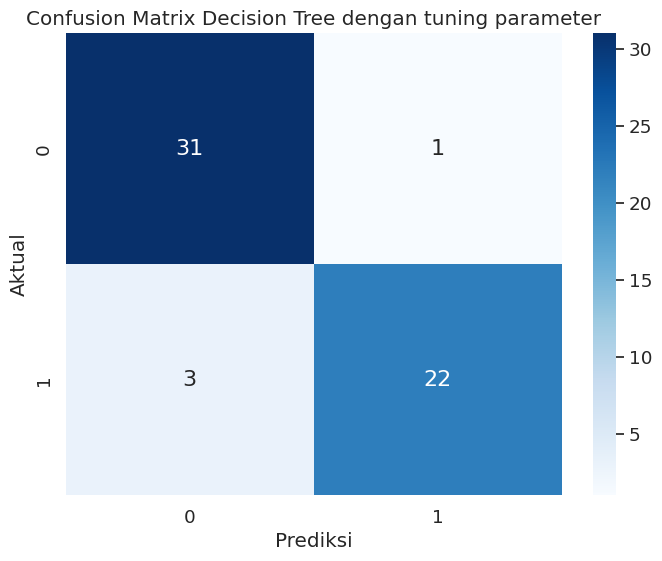

In [220]:
# Visualisasi Confusion Matrix dengan Seaborn
plt.figure(figsize=(8, 6))
sns.set(font_scale=1.2)  # Atur skala font
sns.heatmap(confusion_matrix_tree, annot=True, fmt="d", cmap="Blues", annot_kws={"size": 16})

plt.xlabel('Prediksi')
plt.ylabel('Aktual')
plt.title('Confusion Matrix Decision Tree tanpa tuning parameter')
plt.show()

plt.figure(figsize=(8, 6))
sns.set(font_scale=1.2)  # Atur skala font
sns.heatmap(confusion_matrix_tree_best, annot=True, fmt="d", cmap="Blues", annot_kws={"size": 16})

plt.xlabel('Prediksi')
plt.ylabel('Aktual')
plt.title('Confusion Matrix Decision Tree dengan tuning parameter')
plt.show()

###### KNN

In [221]:
# Define model K-Nearest Neighbors (KNN)
knn_model = KNeighborsClassifier()

# Train model KNN tanpa tuning parameter
knn_model.fit(X_train, y_train)
y_pred_knn = knn_model.predict(X_test)
accuracy_knn = accuracy_score(y_test, y_pred_knn)
print("Accuracy KNN tanpa tuning parameter:", accuracy_knn)
confusion_matrix_knn = confusion_matrix(y_test, y_pred_knn)
print (confusion_matrix_knn)

Accuracy KNN tanpa tuning parameter: 0.8947368421052632
[[29  3]
 [ 3 22]]


In [222]:

# Tuning parameter KNN dengan Grid Search CV
param_grid_knn = {'n_neighbors': [1, 2, 3, 4, 5],
                  'weights': ['uniform', 'distance']}
grid_search_knn = GridSearchCV(knn_model, param_grid_knn, cv=5)
grid_search_knn.fit(X_train, y_train)
best_knn_model = grid_search_knn.best_estimator_
best_knn_model.fit(X_train, y_train)
y_pred_knn_best = best_knn_model.predict(X_test)
accuracy_knn_best = accuracy_score(y_test, y_pred_knn_best)

# Evaluasi hasil untuk model Decision knn dan KNN
print("Accuracy KNN dengan tuning parameter:", accuracy_knn_best)
confusion_matrix_knn_best = confusion_matrix(y_test, y_pred_knn_best)
print (confusion_matrix_knn_best)

Accuracy KNN dengan tuning parameter: 0.8947368421052632
[[29  3]
 [ 3 22]]


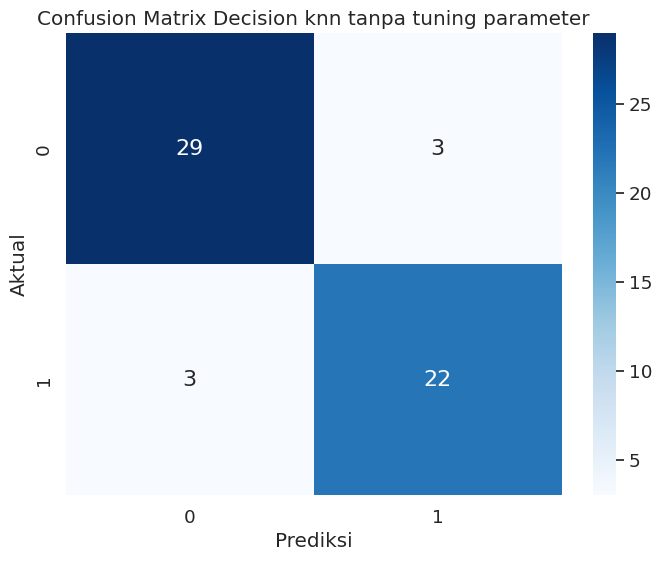

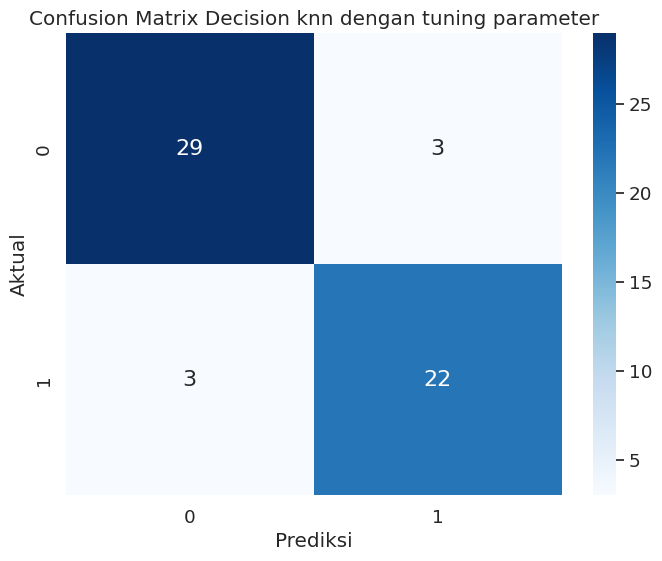

In [223]:
# Visualisasi Confusion Matrix dengan Seaborn
plt.figure(figsize=(8, 6))
sns.set(font_scale=1.2)  # Atur skala font
sns.heatmap(confusion_matrix_knn, annot=True, fmt="d", cmap="Blues", annot_kws={"size": 16})

plt.xlabel('Prediksi')
plt.ylabel('Aktual')
plt.title('Confusion Matrix Decision knn tanpa tuning parameter')
plt.show()

plt.figure(figsize=(8, 6))
sns.set(font_scale=1.2)  # Atur skala font
sns.heatmap(confusion_matrix_knn_best, annot=True, fmt="d", cmap="Blues", annot_kws={"size": 16})

plt.xlabel('Prediksi')
plt.ylabel('Aktual')
plt.title('Confusion Matrix Decision knn dengan tuning parameter')
plt.show()

###### SVM

In [224]:
# Define model SVM
svm_model = SVC(random_state=789)

# Train model SVM tanpa tuning parameter
svm_model.fit(X_train, y_train)
y_pred_svm = svm_model.predict(X_test)
accuracy_svm = accuracy_score(y_test, y_pred_svm)
print("Accuracy SVM tanpa tuning parameter:", accuracy_svm)
confusion_matrix_svm = confusion_matrix(y_test, y_pred_svm)
print (confusion_matrix_svm)

Accuracy SVM tanpa tuning parameter: 0.9298245614035088
[[31  1]
 [ 3 22]]


In [225]:
# Tuning parameter SVM dengan Grid Search CV atau Randomized Search CV
param_grid_svm = {
            'gamma' : ['auto','scale'],
            'C': [1,10,20],
            'kernel': ['rbf','linear','poly','sigmoid']
}

grid_search_svm = GridSearchCV(svm_model, param_grid_svm, cv=5)
grid_search_svm.fit(X_train, y_train)
best_svm_model = grid_search_svm.best_estimator_
best_svm_model.fit(X_train, y_train)
y_pred_svm_best = best_svm_model.predict(X_test)
accuracy_svm_best = accuracy_score(y_test, y_pred_svm_best)

# Evaluasi hasil untuk model SVM
print("Accuracy SVM dengan tuning parameter:", accuracy_svm_best)
confusion_matrix_svm_best = confusion_matrix(y_test, y_pred_svm_best)
print (confusion_matrix_svm_best)

Accuracy SVM dengan tuning parameter: 0.9298245614035088
[[31  1]
 [ 3 22]]


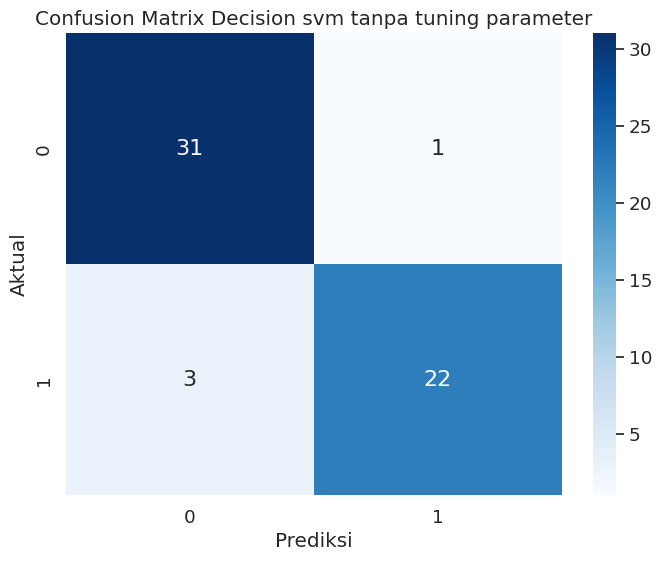

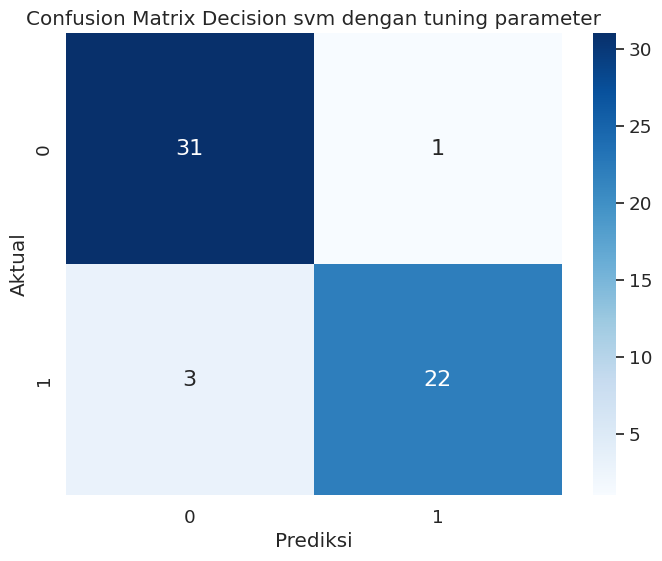

In [226]:
# Visualisasi Confusion Matrix dengan Seaborn
plt.figure(figsize=(8, 6))
sns.set(font_scale=1.2)  # Atur skala font
sns.heatmap(confusion_matrix_svm, annot=True, fmt="d", cmap="Blues", annot_kws={"size": 16})

plt.xlabel('Prediksi')
plt.ylabel('Aktual')
plt.title('Confusion Matrix Decision svm tanpa tuning parameter')
plt.show()

plt.figure(figsize=(8, 6))
sns.set(font_scale=1.2)  # Atur skala font
sns.heatmap(confusion_matrix_svm_best, annot=True, fmt="d", cmap="Blues", annot_kws={"size": 16})

plt.xlabel('Prediksi')
plt.ylabel('Aktual')
plt.title('Confusion Matrix Decision svm dengan tuning parameter')
plt.show()

###### Forest

In [227]:
# Define model Random Forest
rf_model = RandomForestClassifier(random_state=789)

# Train model Random Forest tanpa tuning parameter
rf_model.fit(X_train, y_train)
y_pred_rf = rf_model.predict(X_test)
accuracy_rf = accuracy_score(y_test, y_pred_rf)
print("Accuracy Random Forest tanpa tuning parameter:", accuracy_rf)
confusion_matrix_rf = confusion_matrix(y_test, y_pred_rf)
print (confusion_matrix_rf)

Accuracy Random Forest tanpa tuning parameter: 0.9298245614035088
[[31  1]
 [ 3 22]]


In [228]:
# Tuning parameter Random Forest dengan Grid Search CV
param_grid_rf = {
    'n_estimators': [1,5,10]
}

grid_search_rf = GridSearchCV(rf_model, param_grid_rf, cv=5)
grid_search_rf.fit(X_train, y_train)
best_rf_model = grid_search_rf.best_estimator_
best_rf_model.fit(X_train, y_train)
y_pred_rf_best = best_rf_model.predict(X_test)
accuracy_rf_best = accuracy_score(y_test, y_pred_rf_best)

# Evaluasi hasil untuk model Random Forest
print("Accuracy Random Forest dengan tuning parameter:", accuracy_rf_best)
confusion_matrix_rf_best = confusion_matrix(y_test, y_pred_rf_best)
print(confusion_matrix_rf_best)

Accuracy Random Forest dengan tuning parameter: 0.9298245614035088
[[31  1]
 [ 3 22]]


###### Regresi Logistik

In [229]:
# Define model Regresi Logistik
rl_model = LogisticRegression(random_state=789)

# Train model Regresi Logistik tanpa tuning parameter
rl_model.fit(X_train, y_train)
y_pred_rl = rl_model.predict(X_test)
accuracy_rl = accuracy_score(y_test, y_pred_rl)
print("Accuracy Regresi Logistik tanpa tuning parameter:", accuracy_rl)
confusion_matrix_rl = confusion_matrix(y_test, y_pred_rl)
print (confusion_matrix_rl)

Accuracy Regresi Logistik tanpa tuning parameter: 0.9298245614035088
[[31  1]
 [ 3 22]]


In [230]:
# Tuning parameter Regresi Logistik dengan Grid Search CV atau Randomized Search CV
param_grid_rl = {
    'C': [1,5,10]
}

grid_search_rl = GridSearchCV(rl_model, param_grid_rl, cv=5)
grid_search_rl.fit(X_train, y_train)
best_rl_model = grid_search_rl.best_estimator_
best_rl_model.fit(X_train, y_train)
y_pred_rl_best = best_rl_model.predict(X_test)
accuracy_rl_best = accuracy_score(y_test, y_pred_rl_best)

# Evaluasi hasil untuk model Regresi Logistik
print("Accuracy Regresi Logistik dengan tuning parameter:", accuracy_rl_best)
confusion_matrix_rl_best = confusion_matrix(y_test, y_pred_rl_best)
print (confusion_matrix_rl_best)

Accuracy Regresi Logistik dengan tuning parameter: 0.9298245614035088
[[31  1]
 [ 3 22]]


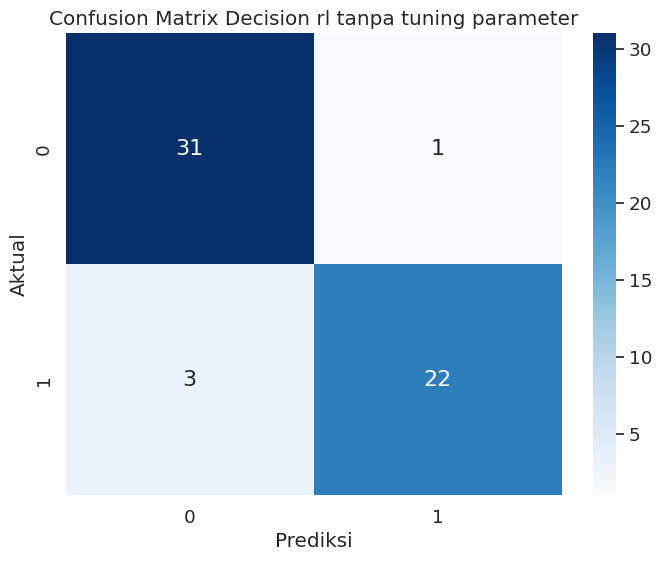

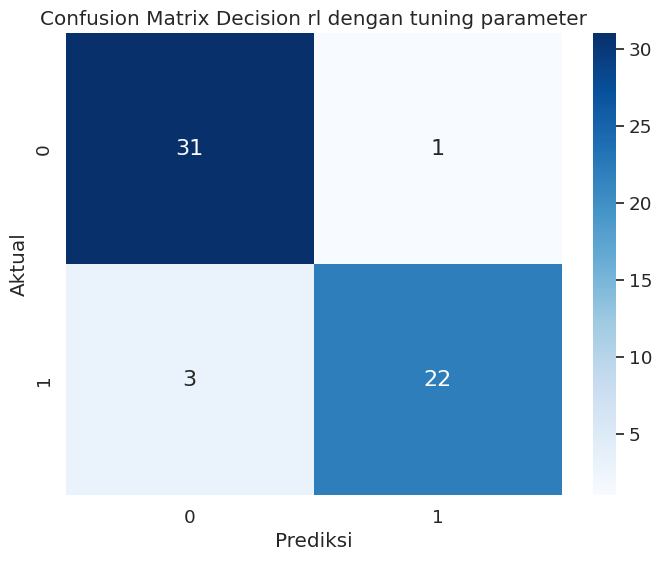

In [231]:
# Visualisasi Confusion Matrix dengan Seaborn
plt.figure(figsize=(8, 6))
sns.set(font_scale=1.2)  # Atur skala font
sns.heatmap(confusion_matrix_rl, annot=True, fmt="d", cmap="Blues", annot_kws={"size": 16})

plt.xlabel('Prediksi')
plt.ylabel('Aktual')
plt.title('Confusion Matrix Decision rl tanpa tuning parameter')
plt.show()

plt.figure(figsize=(8, 6))
sns.set(font_scale=1.2)  # Atur skala font
sns.heatmap(confusion_matrix_rl_best, annot=True, fmt="d", cmap="Blues", annot_kws={"size": 16})

plt.xlabel('Prediksi')
plt.ylabel('Aktual')
plt.title('Confusion Matrix Decision rl dengan tuning parameter')
plt.show()

#### Model KLasifikasi dengan Standart

In [232]:
# Bagi dataset menjadi train dan test (90% - 10%)
X = standard_df[list(standard_df.columns[1:])]
y = standard_df[list(standard_df.columns[0:1])].values.ravel()
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=789)


In [233]:
X.head()

,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,smoothness_se,compactness_se,concavity_se,concave points_se,symmetry_se,fractal_dimension_se,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,1.568466,3.283515,2.652874,2.532475,2.217515,2.255747,-0.214002,1.316862,0.724026,0.660820,1.148757,0.907083,1.307686,2.616665,2.109526,2.296076,2.750622,1.937015
1,-0.826962,-0.487072,-0.023846,0.548144,0.001392,-0.868652,-0.605351,-0.692926,-0.440780,0.260162,-0.805450,-0.099444,-0.375612,-0.430444,-0.146749,1.087084,-0.243890,0.281190
2,0.942210,1.052926,1.363478,2.037231,0.939685,-0.398008,-0.297005,0.814974,0.213076,1.424827,0.237036,0.293559,0.527407,1.082932,0.854974,1.955000,1.152255,0.201391
3,3.283553,3.402909,1.915897,1.451707,2.867383,4.910919,0.689702,2.744280,0.819518,1.115007,4.732680,2.047511,3.394275,3.893397,1.989588,2.175786,6.046041,4.935010
4,0.280372,0.539340,1.371011,1.428493,-0.009560,-0.562450,1.483067,-0.048520,0.828471,1.144205,-0.361092,0.499328,0.220556,-0.313395,0.613179,0.729259,-0.868353,-0.397100


In [234]:
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(512, 18)
(512,)
(57, 18)
(57,)


Tunning

In [235]:
model_params = {
    'svm': {
        'model': svm.SVC(random_state=789, gamma='auto'),
        'params' : {
            'gamma' : ['auto','scale'],
            'C': [1,10,20],
            'kernel': ['rbf','linear','poly','sigmoid']
        }
    },
    'random_forest': {
        'model': RandomForestClassifier(random_state=789),
        'params' : {
            'n_estimators': [1,5,10]
        }
    },
    'logistic_regression' : {
        'model': LogisticRegression(solver='liblinear',multi_class='auto'),
        'params': {
            'C': [1,5,10]
        }
    },
    'Decision_Tree' : {
        'model': DecisionTreeClassifier(random_state=789),
        'params': {
            'criterion': ["gini","entropy"],
            'max_depth' : range(1,10),
            'min_samples_leaf': range(2,10)
        }
    },
    'KNN' :{
        'model' : KNeighborsClassifier(),
        'params' : {
            'n_neighbors': [1, 2, 3, 4, 5],
            'weights': ['uniform', 'distance']
        }
    }
}


for model_name, mp in model_params.items():
    clf =  GridSearchCV(mp['model'], mp['params'], cv=5, return_train_score=False)
    clf.fit(X_train, y_train)
    best_model = clf.best_estimator_
    y_pred = best_model.predict(X_test)
    cm = confusion_matrix(y_test, y_pred)
    scores.append({
        'model': model_name,
        'best_score': clf.best_score_,
        'best_params': clf.best_params_,
        'scaller': 'Standard',
        'Confusion_Matrix': cm

    })


In [236]:
model_params2 = {
    'svm': {
        'model': svm.SVC(random_state=789),
        'params' : {
        }
    },
    'random_forest': {
        'model': RandomForestClassifier(random_state=789),
        'params' : {
        }
    },
    'logistic_regression' : {
        'model': LogisticRegression(),
        'params': {
        }
    },
    'Decision_Tree' : {
        'model': DecisionTreeClassifier(random_state=789),
        'params': {
        }
    },
    'KNN' :{
        'model': KNeighborsClassifier(),
        'params': {
        }
    }
}

In [237]:

for model_name, mp in model_params2.items():
  seed = 789
  clf =  mp['model']
  print(model_name)
  print (clf)
  clf.fit(X_train, y_train)
  y_pred = clf.predict(X_test)
  accuracy = accuracy_score(y_test, y_pred)
  cm = confusion_matrix(y_test, y_pred)
  print (accuracy)
  print(cm)

  scores.append({
        'model': model_name,
        'best_score': accuracy,
        'best_params': "default",
        'scaller': 'Standard',
        'Confusion_Matrix': cm
    })

result = pd.DataFrame(scores,columns=['model','best_score','best_params', 'scaller', 'Confusion_Matrix'])
result

svm
SVC(random_state=789)
0.9298245614035088
[[31  1]
 [ 3 22]]
random_forest
RandomForestClassifier(random_state=789)
0.9298245614035088
[[31  1]
 [ 3 22]]
logistic_regression
LogisticRegression()
0.9298245614035088
[[31  1]
 [ 3 22]]
Decision_Tree
DecisionTreeClassifier(random_state=789)
0.9298245614035088
[[30  2]
 [ 2 23]]
KNN
KNeighborsClassifier()
0.8947368421052632
[[29  3]
 [ 3 22]]


,model,best_score,best_params,scaller,Confusion_Matrix
0,svm,0.943385,"{'C': 10, 'gamma': 'auto', 'kernel': 'linear'}",Robust,"[[31, 1], [4, 21]]"
1,random_forest,0.939406,{'n_estimators': 10},Robust,"[[31, 1], [3, 22]]"
2,logistic_regression,0.943347,{'C': 1},Robust,"[[31, 1], [3, 22]]"
3,Decision_Tree,0.933524,"{'criterion': 'gini', 'max_depth': 6, 'min_sam...",Robust,"[[31, 1], [3, 22]]"
4,KNN,0.929678,"{'n_neighbors': 3, 'weights': 'uniform'}",Robust,"[[29, 3], [3, 22]]"
5,svm,0.929825,default,Robust,"[[31, 1], [3, 22]]"
6,random_forest,0.929825,default,Robust,"[[31, 1], [3, 22]]"
7,logistic_regression,0.929825,default,Robust,"[[31, 1], [3, 22]]"
8,Decision_Tree,0.929825,default,Robust,"[[30, 2], [2, 23]]"
9,KNN,0.929825,default,Robust,"[[31, 1], [3, 22]]"


##### Detail Model

###### Tree

In [238]:
# Define model Decision Tree
tree_model = DecisionTreeClassifier(random_state=789)

# Train model Decision Tree tanpa tuning parameter
tree_model.fit(X_train, y_train)
y_pred_tree = tree_model.predict(X_test)
accuracy_tree = accuracy_score(y_test, y_pred_tree)
print("Accuracy Decision Tree tanpa tuning parameter:", accuracy_tree)
confusion_matrix_tree = confusion_matrix(y_test, y_pred_tree)
print (confusion_matrix_tree)

Accuracy Decision Tree tanpa tuning parameter: 0.9298245614035088
[[30  2]
 [ 2 23]]


In [239]:

# Tuning parameter Decision Tree dengan Randomized Search CV
param_dist_tree = { 'criterion': ["gini","entropy"],
                    'max_depth' : range(1,10),
                    'min_samples_leaf': range(2,10)}
random_search_tree = RandomizedSearchCV(tree_model, param_distributions=param_dist_tree, n_iter=10, cv=5)
random_search_tree.fit(X_train, y_train)
best_tree_model = random_search_tree.best_estimator_
best_tree_model.fit(X_train, y_train)
y_pred_tree_best = best_tree_model.predict(X_test)
accuracy_tree_best = accuracy_score(y_test, y_pred_tree_best)
print("Accuracy Decision Tree dengan tuning parameter:", accuracy_tree_best)
confusion_matrix_tree_best = confusion_matrix(y_test, y_pred_tree_best)
print (confusion_matrix_tree_best)

Accuracy Decision Tree dengan tuning parameter: 0.9298245614035088
[[31  1]
 [ 3 22]]


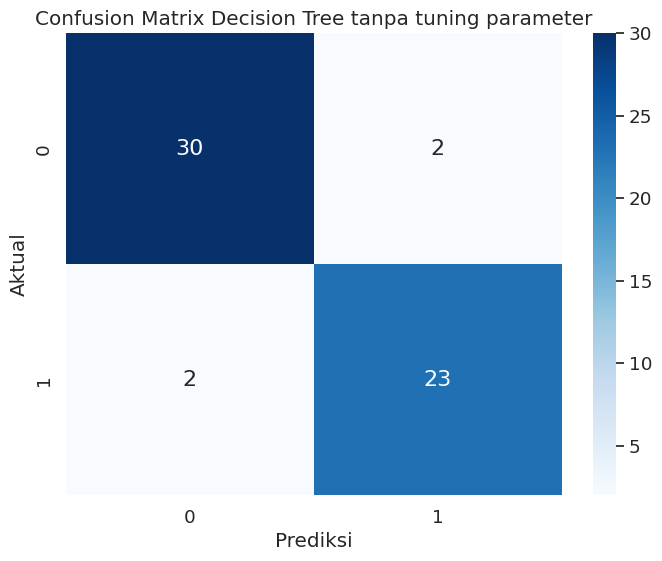

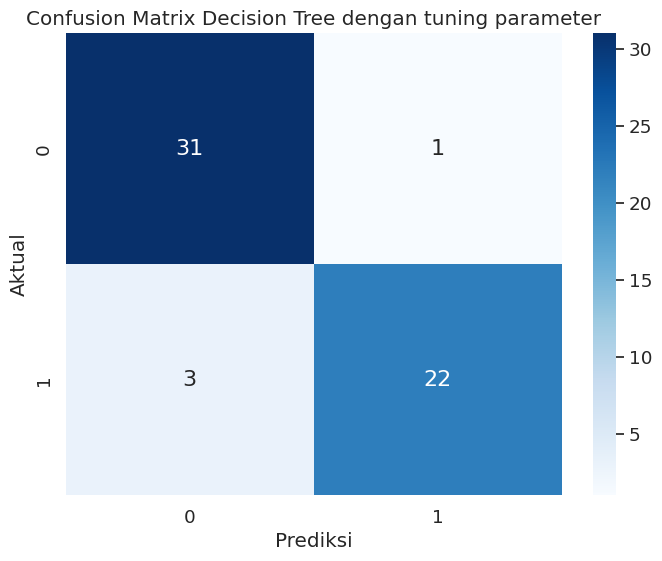

In [240]:
# Visualisasi Confusion Matrix dengan Seaborn
plt.figure(figsize=(8, 6))
sns.set(font_scale=1.2)  # Atur skala font
sns.heatmap(confusion_matrix_tree, annot=True, fmt="d", cmap="Blues", annot_kws={"size": 16})

plt.xlabel('Prediksi')
plt.ylabel('Aktual')
plt.title('Confusion Matrix Decision Tree tanpa tuning parameter')
plt.show()

plt.figure(figsize=(8, 6))
sns.set(font_scale=1.2)  # Atur skala font
sns.heatmap(confusion_matrix_tree_best, annot=True, fmt="d", cmap="Blues", annot_kws={"size": 16})

plt.xlabel('Prediksi')
plt.ylabel('Aktual')
plt.title('Confusion Matrix Decision Tree dengan tuning parameter')
plt.show()

###### KNN

In [241]:
# Define model K-Nearest Neighbors (KNN)
knn_model = KNeighborsClassifier()

# Train model KNN tanpa tuning parameter
knn_model.fit(X_train, y_train)
y_pred_knn = knn_model.predict(X_test)
accuracy_knn = accuracy_score(y_test, y_pred_knn)
print("Accuracy KNN tanpa tuning parameter:", accuracy_knn)
confusion_matrix_knn = confusion_matrix(y_test, y_pred_knn)
print (confusion_matrix_knn)

Accuracy KNN tanpa tuning parameter: 0.8947368421052632
[[29  3]
 [ 3 22]]


In [242]:

# Tuning parameter KNN dengan Grid Search CV
param_grid_knn = {'n_neighbors': [1, 2, 3, 4, 5],
                  'weights': ['uniform', 'distance']}
grid_search_knn = GridSearchCV(knn_model, param_grid_knn, cv=5)
grid_search_knn.fit(X_train, y_train)
best_knn_model = grid_search_knn.best_estimator_
best_knn_model.fit(X_train, y_train)
y_pred_knn_best = best_knn_model.predict(X_test)
accuracy_knn_best = accuracy_score(y_test, y_pred_knn_best)

# Evaluasi hasil untuk model Decision knn dan KNN
print("Accuracy KNN dengan tuning parameter:", accuracy_knn_best)
confusion_matrix_knn_best = confusion_matrix(y_test, y_pred_knn_best)
print (confusion_matrix_knn_best)

Accuracy KNN dengan tuning parameter: 0.8947368421052632
[[29  3]
 [ 3 22]]


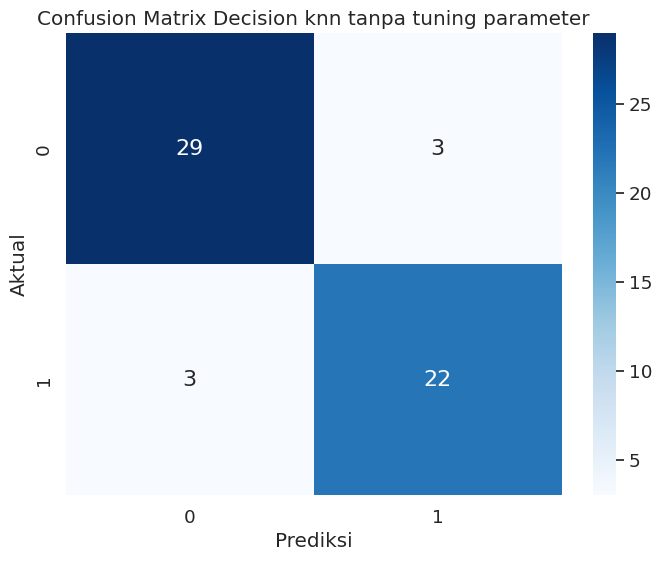

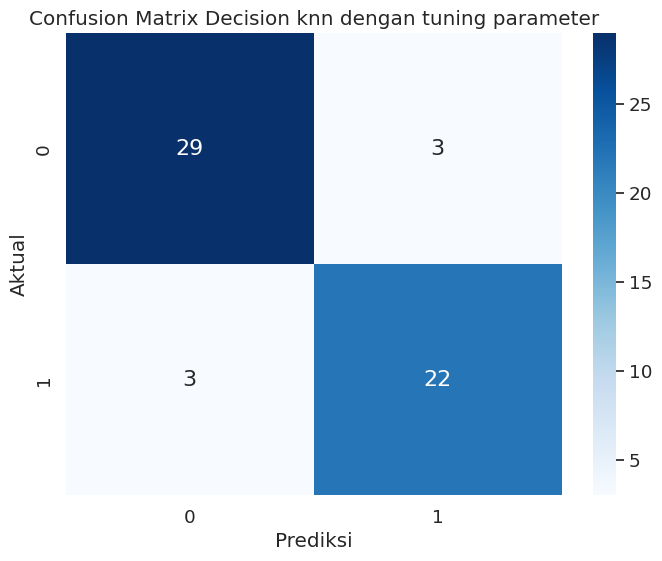

In [243]:
# Visualisasi Confusion Matrix dengan Seaborn
plt.figure(figsize=(8, 6))
sns.set(font_scale=1.2)  # Atur skala font
sns.heatmap(confusion_matrix_knn, annot=True, fmt="d", cmap="Blues", annot_kws={"size": 16})

plt.xlabel('Prediksi')
plt.ylabel('Aktual')
plt.title('Confusion Matrix Decision knn tanpa tuning parameter')
plt.show()

plt.figure(figsize=(8, 6))
sns.set(font_scale=1.2)  # Atur skala font
sns.heatmap(confusion_matrix_knn_best, annot=True, fmt="d", cmap="Blues", annot_kws={"size": 16})

plt.xlabel('Prediksi')
plt.ylabel('Aktual')
plt.title('Confusion Matrix Decision knn dengan tuning parameter')
plt.show()

###### SVM

In [244]:
# Define model SVM
svm_model = SVC(random_state=789)

# Train model SVM tanpa tuning parameter
svm_model.fit(X_train, y_train)
y_pred_svm = svm_model.predict(X_test)
accuracy_svm = accuracy_score(y_test, y_pred_svm)
print("Accuracy SVM tanpa tuning parameter:", accuracy_svm)
confusion_matrix_svm = confusion_matrix(y_test, y_pred_svm)
print (confusion_matrix_svm)

Accuracy SVM tanpa tuning parameter: 0.9298245614035088
[[31  1]
 [ 3 22]]


In [245]:
# Tuning parameter SVM dengan Grid Search CV atau Randomized Search CV
param_grid_svm = {
            'gamma' : ['auto','scale'],
            'C': [1,10,20],
            'kernel': ['rbf','linear','poly','sigmoid']
}

grid_search_svm = GridSearchCV(svm_model, param_grid_svm, cv=5)
grid_search_svm.fit(X_train, y_train)
best_svm_model = grid_search_svm.best_estimator_
best_svm_model.fit(X_train, y_train)
y_pred_svm_best = best_svm_model.predict(X_test)
accuracy_svm_best = accuracy_score(y_test, y_pred_svm_best)

# Evaluasi hasil untuk model SVM
print("Accuracy SVM dengan tuning parameter:", accuracy_svm_best)
confusion_matrix_svm_best = confusion_matrix(y_test, y_pred_svm_best)
print (confusion_matrix_svm_best)

Accuracy SVM dengan tuning parameter: 0.9122807017543859
[[31  1]
 [ 4 21]]


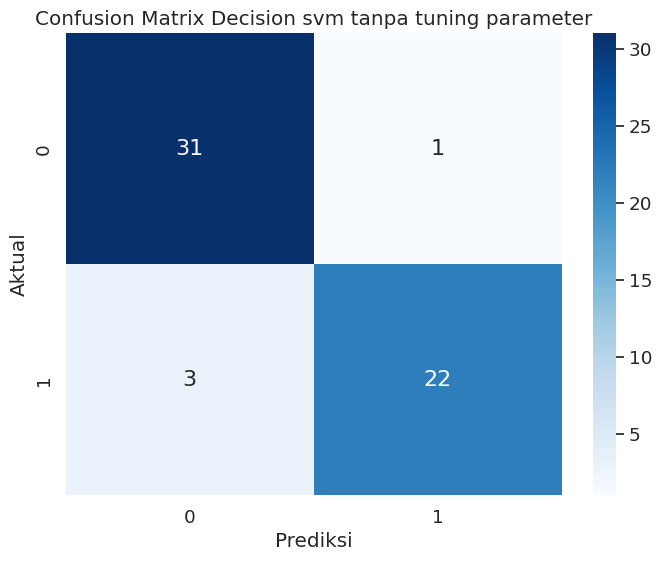

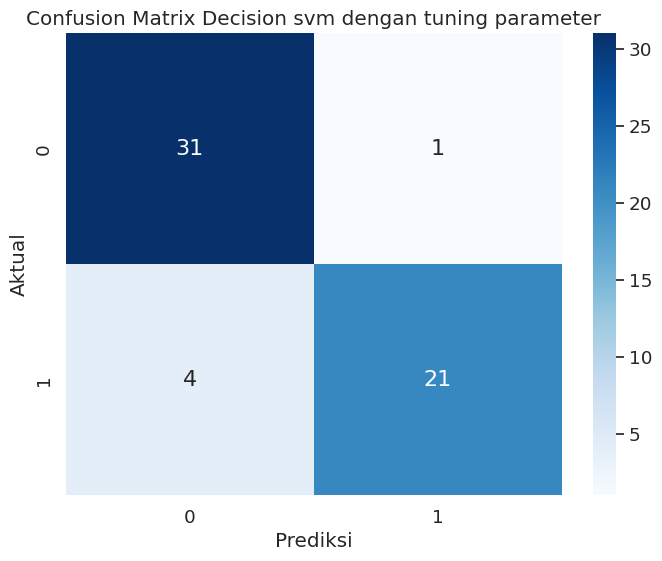

In [246]:
# Visualisasi Confusion Matrix dengan Seaborn
plt.figure(figsize=(8, 6))
sns.set(font_scale=1.2)  # Atur skala font
sns.heatmap(confusion_matrix_svm, annot=True, fmt="d", cmap="Blues", annot_kws={"size": 16})

plt.xlabel('Prediksi')
plt.ylabel('Aktual')
plt.title('Confusion Matrix Decision svm tanpa tuning parameter')
plt.show()

plt.figure(figsize=(8, 6))
sns.set(font_scale=1.2)  # Atur skala font
sns.heatmap(confusion_matrix_svm_best, annot=True, fmt="d", cmap="Blues", annot_kws={"size": 16})

plt.xlabel('Prediksi')
plt.ylabel('Aktual')
plt.title('Confusion Matrix Decision svm dengan tuning parameter')
plt.show()

###### Forest

In [247]:
# Define model Random Forest
rf_model = RandomForestClassifier(random_state=789)

# Train model Random Forest tanpa tuning parameter
rf_model.fit(X_train, y_train)
y_pred_rf = rf_model.predict(X_test)
accuracy_rf = accuracy_score(y_test, y_pred_rf)
print("Accuracy Random Forest tanpa tuning parameter:", accuracy_rf)
confusion_matrix_rf = confusion_matrix(y_test, y_pred_rf)
print (confusion_matrix_rf)

Accuracy Random Forest tanpa tuning parameter: 0.9298245614035088
[[31  1]
 [ 3 22]]


In [248]:
# Tuning parameter Random Forest dengan Grid Search CV
param_grid_rf = {
    'n_estimators': [1,5,10]
}

grid_search_rf = GridSearchCV(rf_model, param_grid_rf, cv=5)
grid_search_rf.fit(X_train, y_train)
best_rf_model = grid_search_rf.best_estimator_
best_rf_model.fit(X_train, y_train)
y_pred_rf_best = best_rf_model.predict(X_test)
accuracy_rf_best = accuracy_score(y_test, y_pred_rf_best)

# Evaluasi hasil untuk model Random Forest
print("Accuracy Random Forest dengan tuning parameter:", accuracy_rf_best)
confusion_matrix_rf_best = confusion_matrix(y_test, y_pred_rf_best)
print(confusion_matrix_rf_best)

Accuracy Random Forest dengan tuning parameter: 0.9298245614035088
[[31  1]
 [ 3 22]]


###### Regresi Logistik

In [249]:
# Define model Regresi Logistik
rl_model = LogisticRegression(random_state=789)

# Train model Regresi Logistik tanpa tuning parameter
rl_model.fit(X_train, y_train)
y_pred_rl = rl_model.predict(X_test)
accuracy_rl = accuracy_score(y_test, y_pred_rl)
print("Accuracy Regresi Logistik tanpa tuning parameter:", accuracy_rl)
confusion_matrix_rl = confusion_matrix(y_test, y_pred_rl)
print (confusion_matrix_rl)

Accuracy Regresi Logistik tanpa tuning parameter: 0.9298245614035088
[[31  1]
 [ 3 22]]


In [250]:
# Tuning parameter Regresi Logistik dengan Grid Search CV atau Randomized Search CV
param_grid_rl = {
    'C': [1,5,10]
}

grid_search_rl = GridSearchCV(rl_model, param_grid_rl, cv=5)
grid_search_rl.fit(X_train, y_train)
best_rl_model = grid_search_rl.best_estimator_
best_rl_model.fit(X_train, y_train)
y_pred_rl_best = best_rl_model.predict(X_test)
accuracy_rl_best = accuracy_score(y_test, y_pred_rl_best)

# Evaluasi hasil untuk model Regresi Logistik
print("Accuracy Regresi Logistik dengan tuning parameter:", accuracy_rl_best)
confusion_matrix_rl_best = confusion_matrix(y_test, y_pred_rl_best)
print (confusion_matrix_rl_best)

Accuracy Regresi Logistik dengan tuning parameter: 0.9122807017543859
[[31  1]
 [ 4 21]]


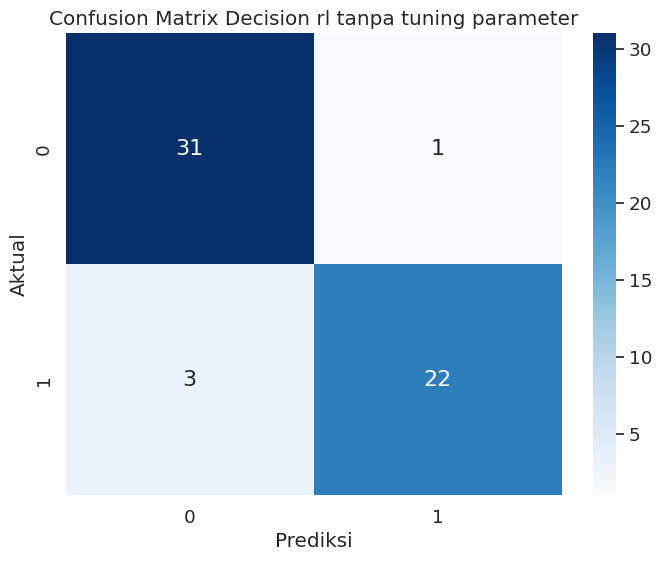

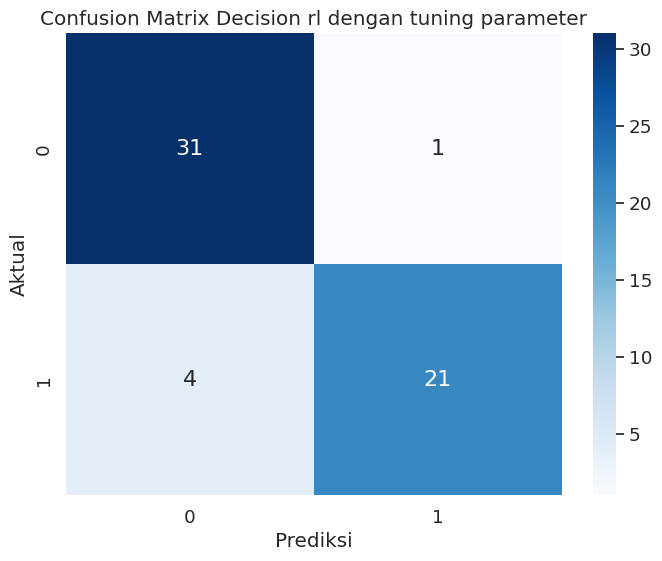

In [251]:
# Visualisasi Confusion Matrix dengan Seaborn
plt.figure(figsize=(8, 6))
sns.set(font_scale=1.2)  # Atur skala font
sns.heatmap(confusion_matrix_rl, annot=True, fmt="d", cmap="Blues", annot_kws={"size": 16})

plt.xlabel('Prediksi')
plt.ylabel('Aktual')
plt.title('Confusion Matrix Decision rl tanpa tuning parameter')
plt.show()

plt.figure(figsize=(8, 6))
sns.set(font_scale=1.2)  # Atur skala font
sns.heatmap(confusion_matrix_rl_best, annot=True, fmt="d", cmap="Blues", annot_kws={"size": 16})

plt.xlabel('Prediksi')
plt.ylabel('Aktual')
plt.title('Confusion Matrix Decision rl dengan tuning parameter')
plt.show()

## Result

In [252]:
result

,model,best_score,best_params,scaller,Confusion_Matrix
0,svm,0.943385,"{'C': 10, 'gamma': 'auto', 'kernel': 'linear'}",Robust,"[[31, 1], [4, 21]]"
1,random_forest,0.939406,{'n_estimators': 10},Robust,"[[31, 1], [3, 22]]"
2,logistic_regression,0.943347,{'C': 1},Robust,"[[31, 1], [3, 22]]"
3,Decision_Tree,0.933524,"{'criterion': 'gini', 'max_depth': 6, 'min_sam...",Robust,"[[31, 1], [3, 22]]"
4,KNN,0.929678,"{'n_neighbors': 3, 'weights': 'uniform'}",Robust,"[[29, 3], [3, 22]]"
5,svm,0.929825,default,Robust,"[[31, 1], [3, 22]]"
6,random_forest,0.929825,default,Robust,"[[31, 1], [3, 22]]"
7,logistic_regression,0.929825,default,Robust,"[[31, 1], [3, 22]]"
8,Decision_Tree,0.929825,default,Robust,"[[30, 2], [2, 23]]"
9,KNN,0.929825,default,Robust,"[[31, 1], [3, 22]]"


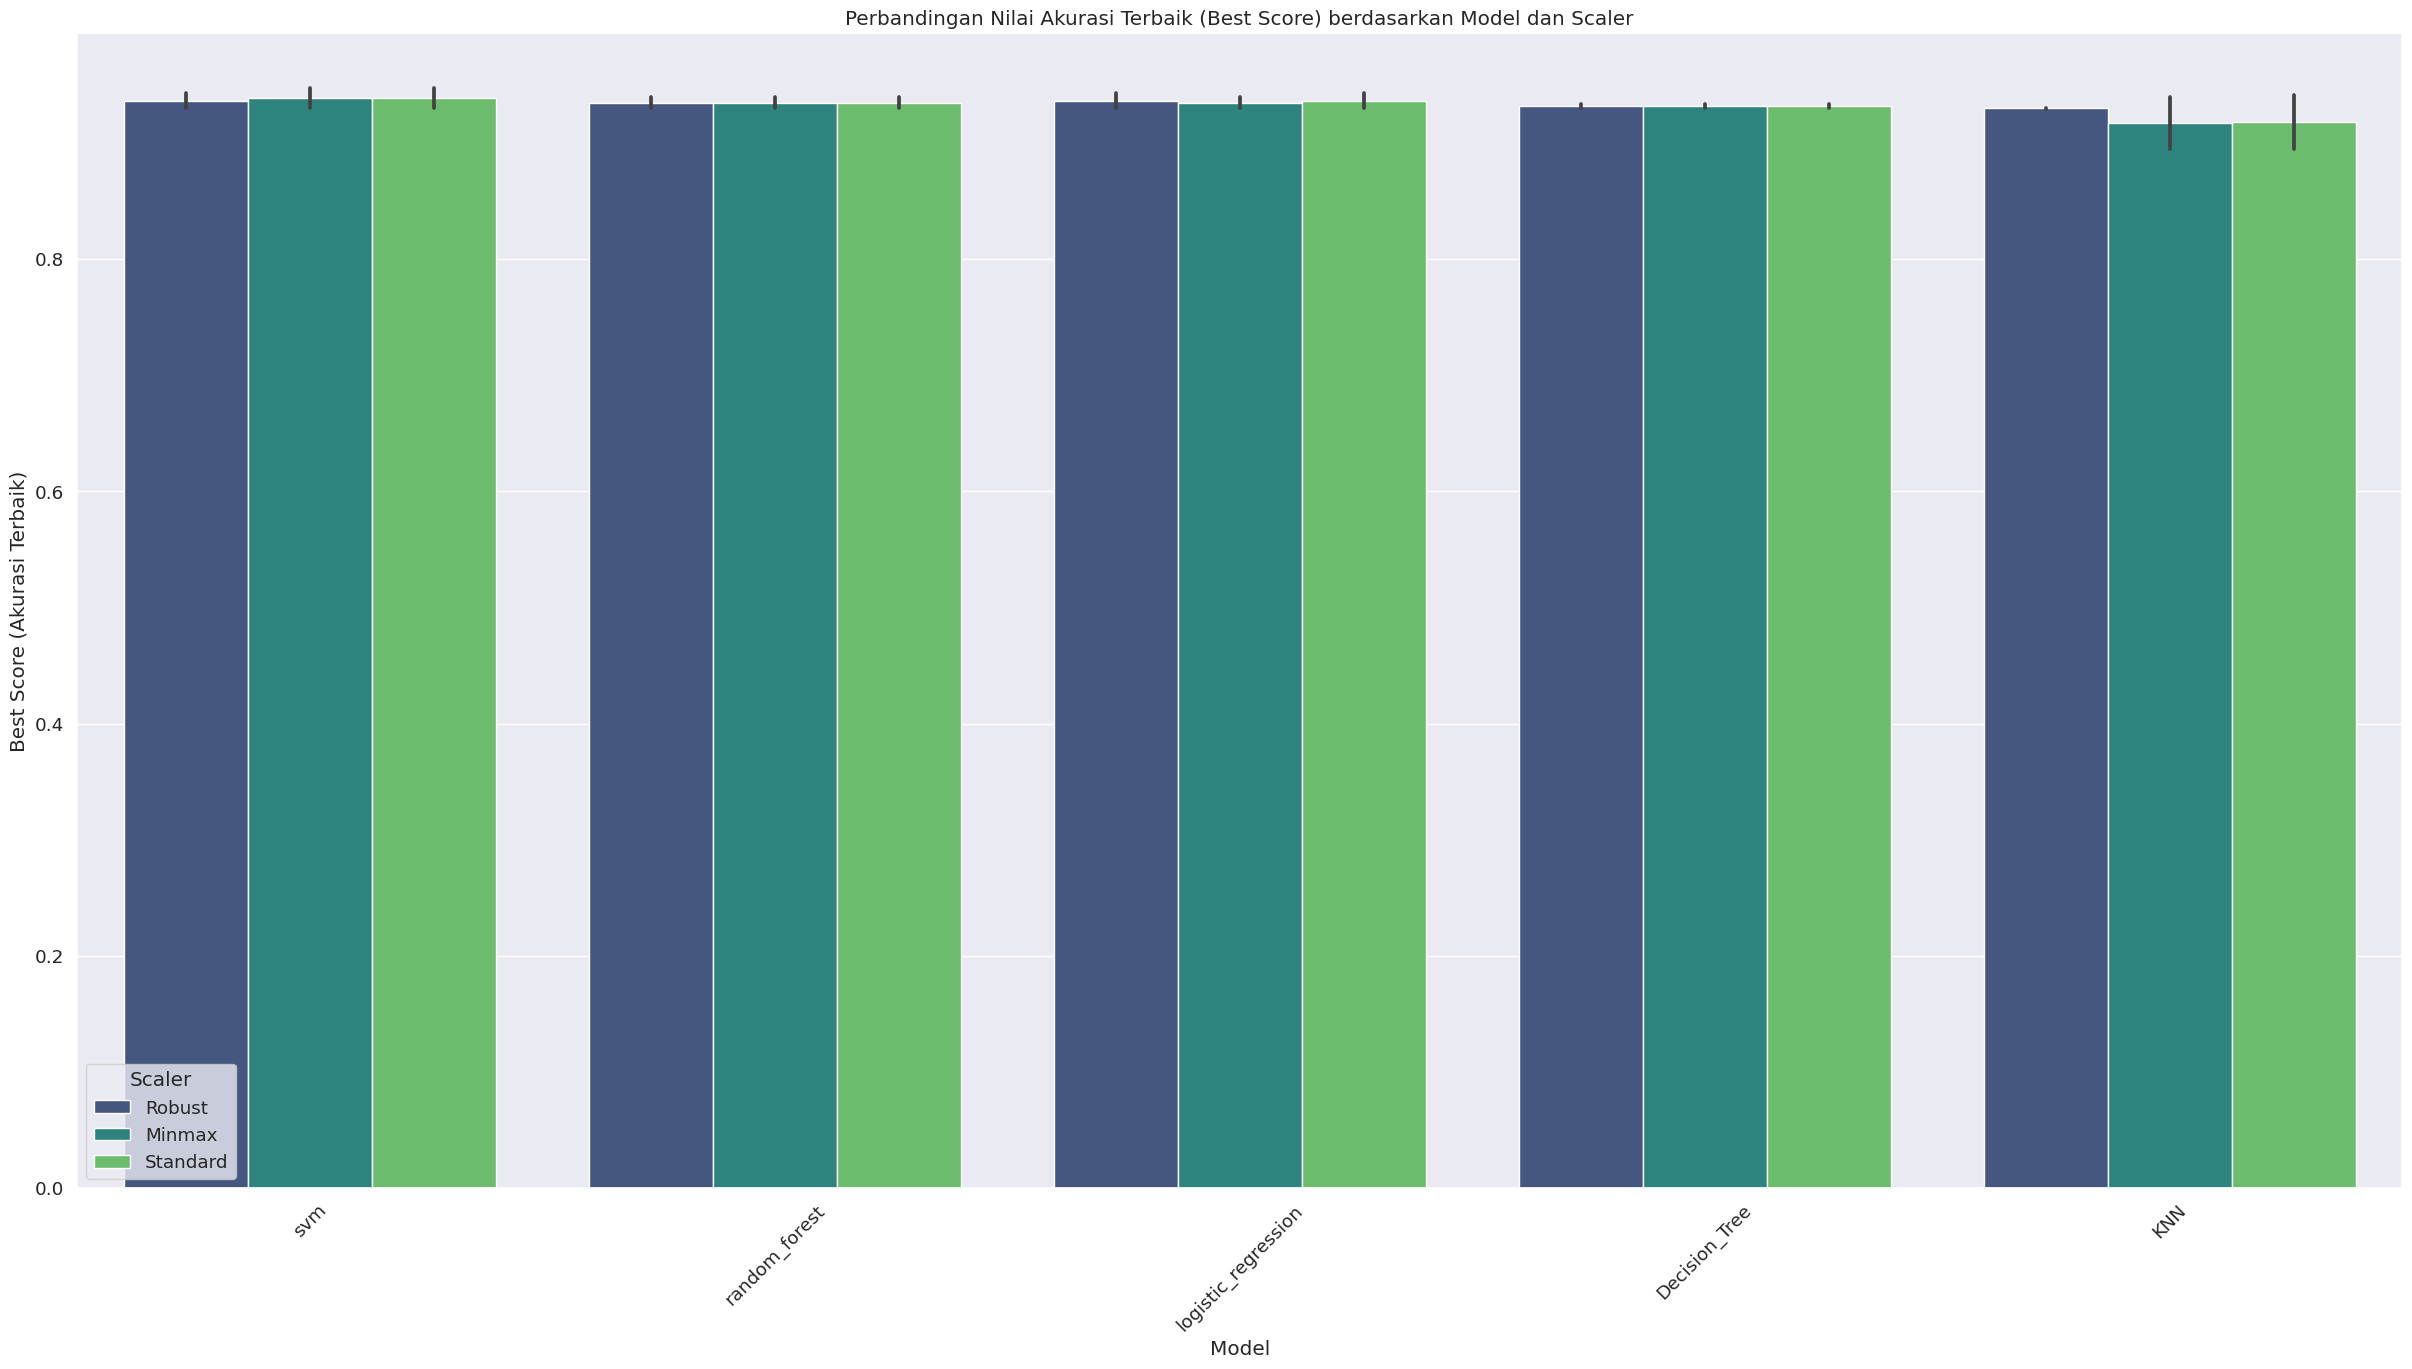

In [272]:
# Data DataFrame result yang telah Anda buat
result = pd.DataFrame(scores, columns=['model', 'best_score', 'best_params', 'scaller', 'Confusion_Matrix'])

# Plot menggunakan Seaborn
plt.figure(figsize=(30, 15))
sns.barplot(x='model', y='best_score', hue='scaller',  data=result, palette='viridis')

plt.title('Perbandingan Nilai Akurasi Terbaik (Best Score) berdasarkan Model dan Scaler')
plt.xlabel('Model')
plt.ylabel('Best Score (Akurasi Terbaik)')
plt.xticks(rotation=45)
plt.legend(title='Scaler')
plt.show()

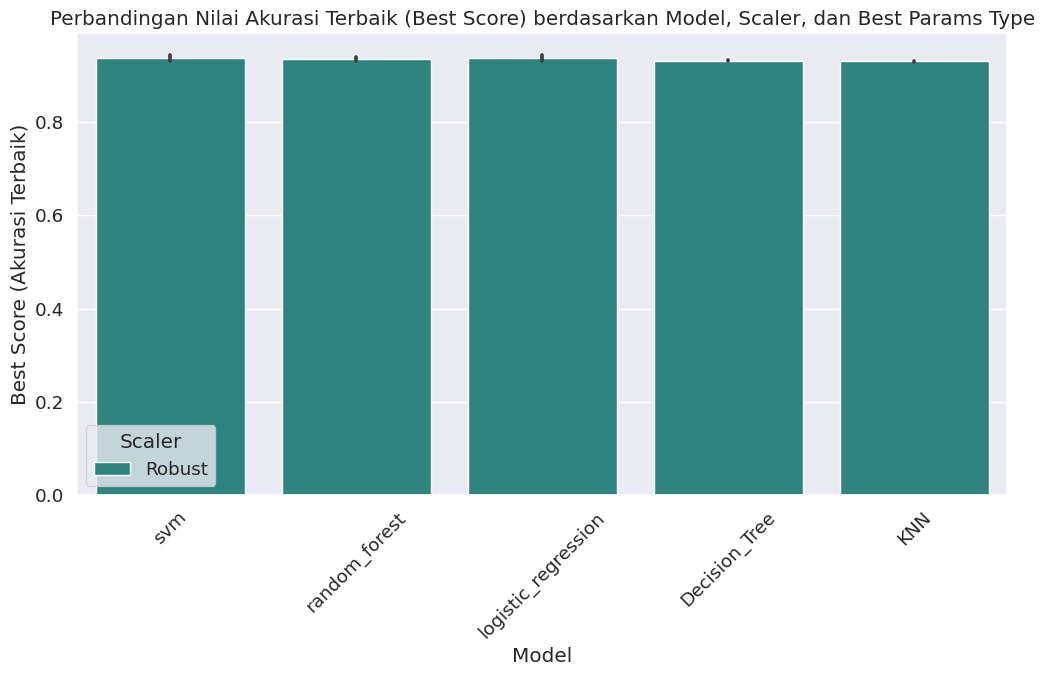

In [274]:
# Tambahkan kolom 'Best Params Type' berdasarkan 'best_params'
result['Best Params Type'] = result['best_params'].apply(lambda x: 'Default' if x == 'default' else 'Tuning')

# Plot menggunakan Seaborn
plt.figure(figsize=(12, 6))

# Plot barplot dengan membedakan warna antara "Default" dan "Tuning" pada kolom 'Best Params Type'
sns.barplot(x='model', y='best_score', hue='scaller', data=result, palette='viridis', hue_order=['Robust'])
plt.title('Perbandingan Nilai Akurasi Terbaik (Best Score) berdasarkan Model, Scaler, dan Best Params Type')
plt.xlabel('Model')
plt.ylabel('Best Score (Akurasi Terbaik)')
plt.xticks(rotation=45)
plt.legend(title='Scaler')